# Customer Segementation with Unsuperviesd ML method

### We are going to do the following part: 
- Feature Prepprocessing
- EDA
- K-mean Clustering 
- Cluster Analyis
- Conclusion

### 1. Loading the clean data

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math 
import json
from tqdm import tqdm
%matplotlib inline

%load_ext autoreload
%autoreload 2
sns.set()
import helper as h

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

In [53]:
transcript_clean, transcript_all = h.transcript_preprocessing(transcript, profile, portfolio)


The transcript_clean.csv and transcript_merge.csv file are available at local folder


In [54]:
transcript_clean = pd.read_csv("data/transcript_clean.csv")

In [55]:
profile_updated = pd.read_csv("data/profile_updated.csv")

In [56]:
profile_updated.head()

Unnamed: 0 gender  age became_member_on    income  \
0  68be06ca386d4c31939f3a4f0e3dd783    NaN  118       2017-02-12       NaN   
1  0610b486422d4921ae7d2bf64640c50b      F   55       2017-07-15  112000.0   
2  38fe809add3b4fcf9315a9694bb96ff5    NaN  118       2018-07-12       NaN   
3  78afa995795e4d85b5d9ceeca43f5fef      F   75       2017-05-09  100000.0   
4  a03223e636434f42ac4c3df47e8bac43    NaN  118       2017-08-04       NaN   

   offer received_bogo_10_10_7  offer received_bogo_10_10_5  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          1.0                          0.0   
4                          0.0                          0.0   

   offer received_informational_0_0_4  offer received_bogo_5_5_7  \
0                                 0.0                        0.0   
1                                 1.0                        1.0   
2                                 0.0                        1.0   
3                                 0.0                        1.0   
4                                 1.0                        0.0   

   offer received_discount_20_5_10  ...  \
0                              1.0  ...   
1                              0.0  ...   
2                              0.0  ...   
3                              0.0  ...   
4                              3.0  ...   

   rate_offer_completed_viewed_discount_10_2_10  \
0                                           0.5   
1                                           0.0   
2                                           0.0   
3                                           0.0   
4                                           0.0   

   rate_offer_completed_received_discount_10_2_10  \
0                                             0.5   
1                                             0.0   
2                                             0.0   
3                                             0.0   
4                                             0.0   

   rate_offer_viewed_informational_0_0_3  rate_offer_viewed_bogo_5_5_5  \
0                                    0.0                           0.0   
1                                    0.0                           0.0   
2                                    1.0                           0.0   
3                                    1.0                           1.0   
4                                    0.0                           0.0   

   rate_offer_completed_viewed_bogo_5_5_5  \
0                                     0.0   
1                                     0.0   
2                                     0.0   
3                                     0.0   
4                                     0.0   

   rate_offer_completed_received_bogo_5_5_5  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   

   rate_offer_viewed_discount_10_2_7  \
0                                1.0   
1                                0.0   
2                                0.0   
3                                0.0   
4                                0.0   

   rate_offer_completed_viewed_discount_10_2_7  \
0                                          0.0   
1                                          0.0   
2                                          0.0   
3                                          0.0   
4                                          0.0   

   rate_offer_completed_received_discount_10_2_7  transaction_completed_ratio  
0                                            0.0                     4.285714  
1                                            0.0                    30.000000  
2                                            0.0                    60.000000  
3                     

In [57]:
transcript_clean.head()

Unnamed: 0                            person           event  \
0           0  78afa995795e4d85b5d9ceeca43f5fef  offer received   
1           1  a03223e636434f42ac4c3df47e8bac43  offer received   
2           2  e2127556f4f64592b11af22de27a7932  offer received   
3           3  8ec6ce2a7e7949b1bf142def7d0e0586  offer received   
4           4  68617ca6246f4fbc85e91a2a49552598  offer received   

                                              value  time  \
0  {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}     0   
1  {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}     0   
2  {'offer id': '2906b810c7d4411798c6938adc9daaa5'}     0   
3  {'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}     0   
4  {'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}     0   

                           offer_id  amount gender  age became_member_on  ...  \
0  9b98b8c7a33c4b65b9aebfe6a799e6d9     NaN      F   75       2017-05-09  ...   
1  0b1e1539f2cc45b7b9fa7c272da2e1d7     NaN    NaN  118       2017-08-04  ...   
2  2906b810c7d4411798c6938adc9daaa5     NaN      M   68       2018-04-26  ...   
3  fafdcd668e3743c1bb461111dcafc2a4     NaN    NaN  118       2017-09-25  ...   
4  4d5c57ea9a6940dd891ad53e9dbe8da0     NaN    NaN  118       2017-10-02  ...   

   reward  difficulty  duration  offer_type              name  web  email  \
0     5.0         5.0       7.0        bogo        bogo_5_5_7  1.0    1.0   
1     5.0        20.0      10.0    discount  discount_20_5_10  1.0    1.0   
2     2.0        10.0       7.0    discount   discount_10_2_7  1.0    1.0   
3     2.0        10.0      10.0    discount  discount_10_2_10  1.0    1.0   
4    10.0        10.0       5.0        bogo      bogo_10_10_5  1.0    1.0   

   mobile  social  invalid  
0     1.0     0.0      0.0  
1     0.0     0.0      0.0  
2     1.0     0.0      0.0  
3     1.0     1.0      0.0  
4     1.0     1.0      0.0  

[5 rows x 21 columns]

## Feature Preprocessing 

### Missing in colums

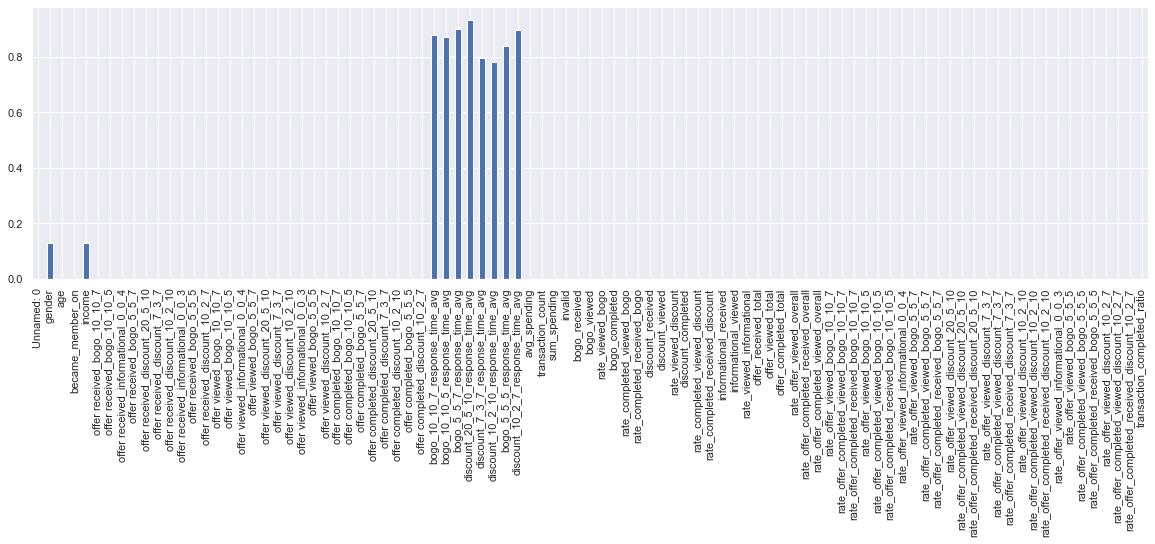

In [58]:
col_null = profile_updated.isnull().sum()
col_null_frac = col_null / profile_updated.shape[0]

plt.figure(figsize= (20,5))
col_null_frac.plot(kind='bar')

In [59]:
col_drop = col_null_frac[col_null_frac > 0.5].index.tolist()
col_drop

['bogo_10_10_7_response_time_avg',
 'bogo_10_10_5_response_time_avg',
 'bogo_5_5_7_response_time_avg',
 'discount_20_5_10_response_time_avg',
 'discount_7_3_7_response_time_avg',
 'discount_10_2_10_response_time_avg',
 'bogo_5_5_5_response_time_avg',
 'discount_10_2_7_response_time_avg']

In [60]:
profile_updated_ = profile_updated.drop(col_drop, axis=1)

# copy profile with response time 
profile_response_time = profile_updated.copy()

### Missing in rows

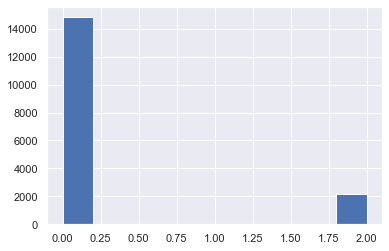

In [61]:
row_null = profile_updated_.isnull().sum(axis = 1)
row_null.hist()

In [62]:
def dist_compare_cont(feature, data):
    row_null = data.isnull().sum(axis = 1)
    f, (ax1, ax2) = plt.subplots(1,2 , sharex = True, figsize = (8, 3))
    ax1 = data[row_null == 0][feature].hist( ax = ax1, bins = 20)
    ax2 = data[row_null >0 ][feature].hist(ax = ax2, bins = 20)
    ax1.set_title("No missing data")
    ax2.set_title("With missing data")
    f.suptitle("Feature: " + feature)
    f.tight_layout()
    f.subplots_adjust(top=0.8)


C:\Users\Xwt\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


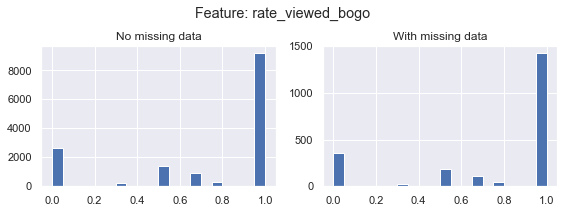

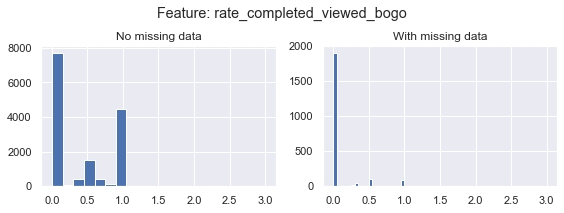

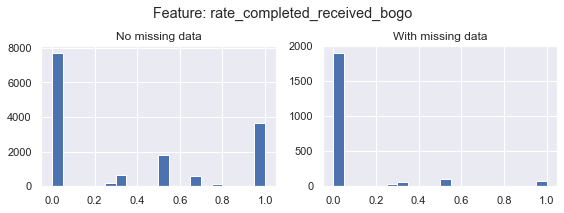

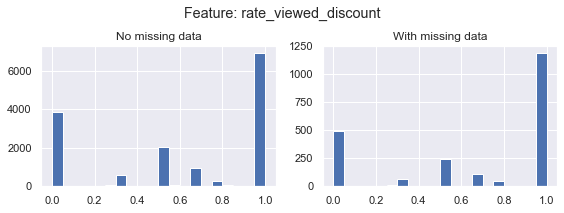

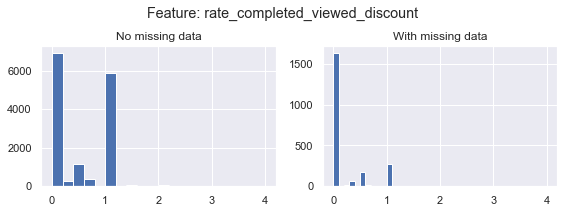

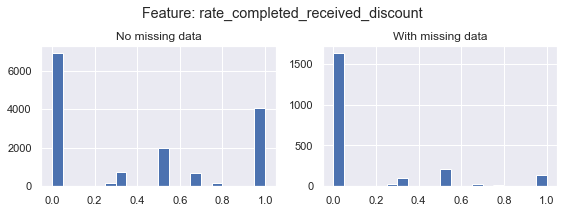

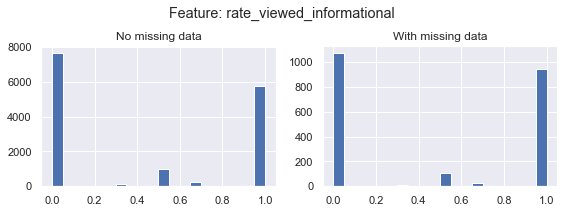

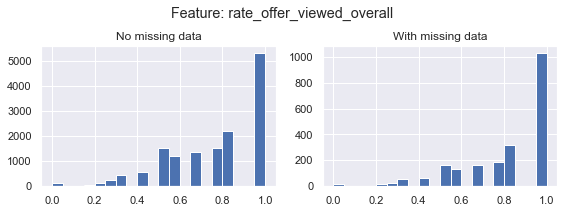

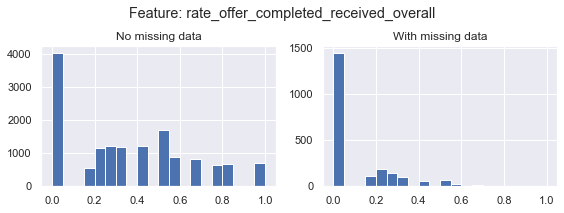

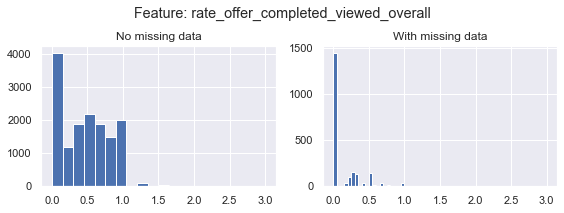

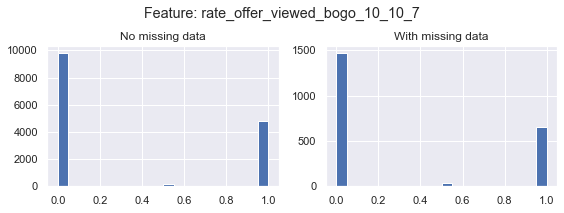

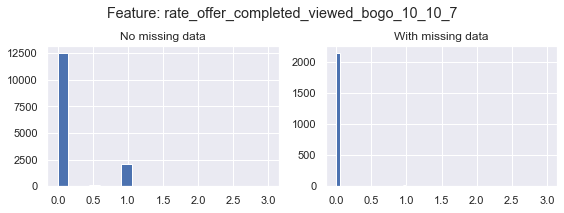

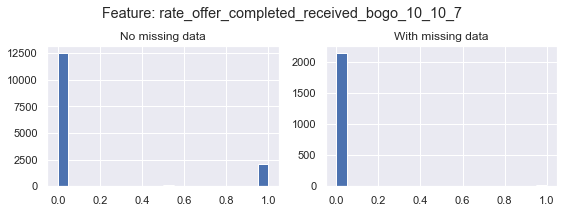

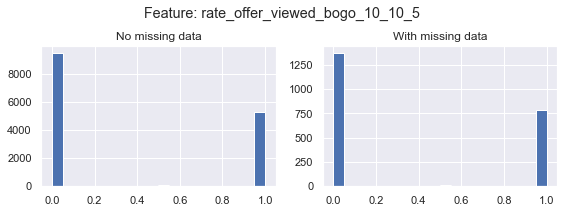

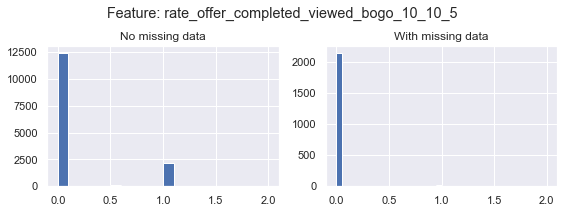

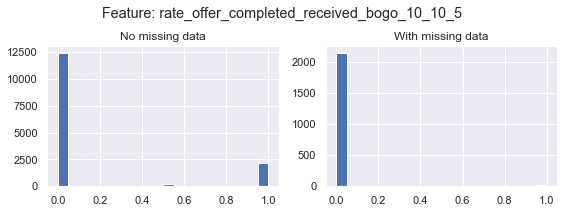

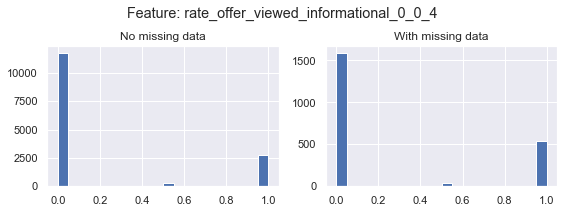

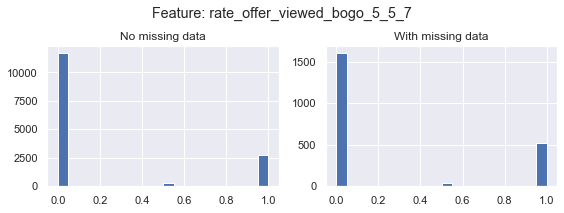

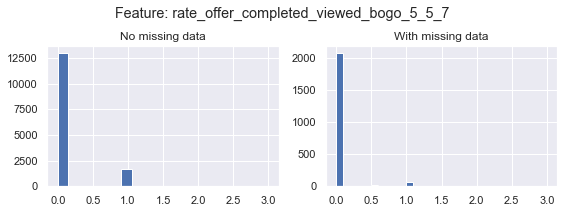

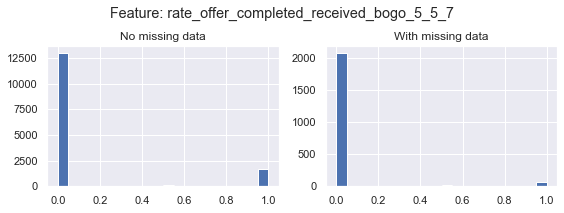

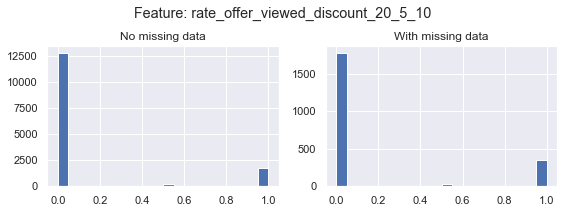

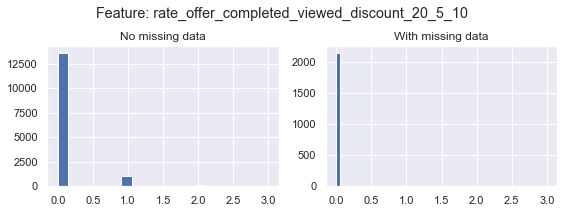

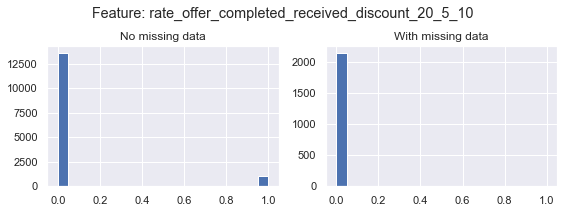

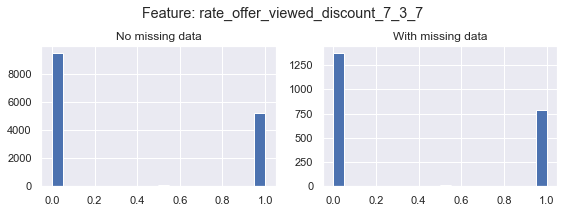

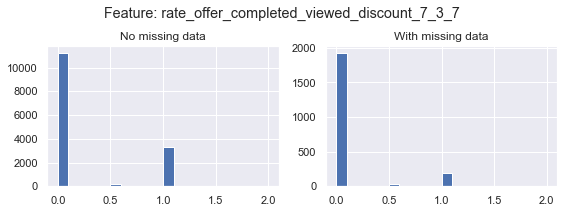

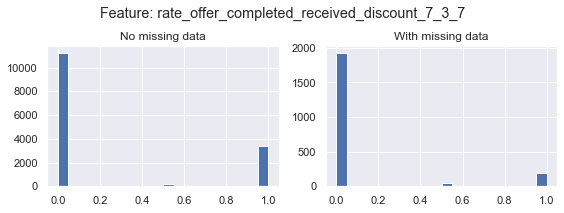

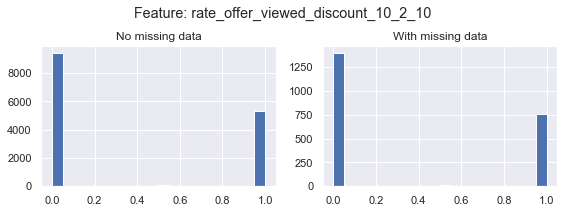

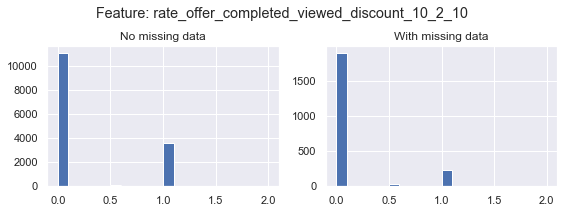

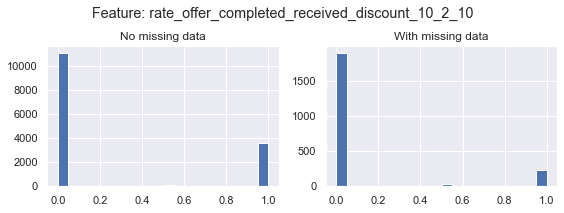

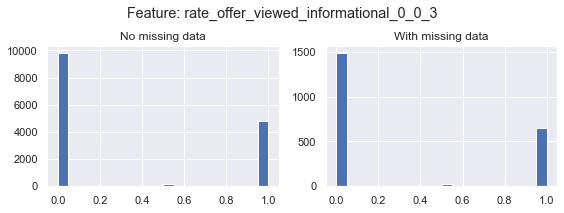

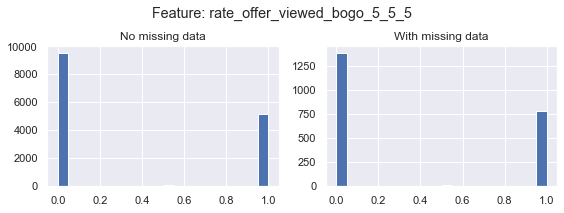

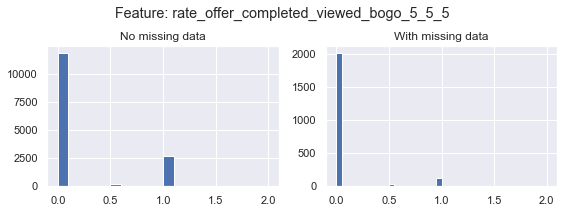

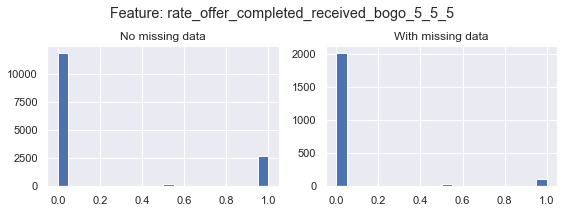

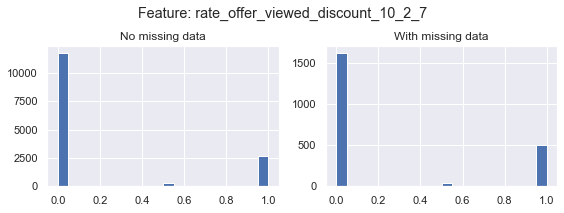

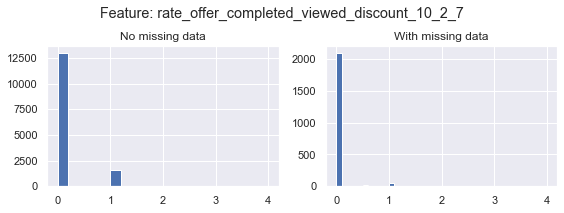

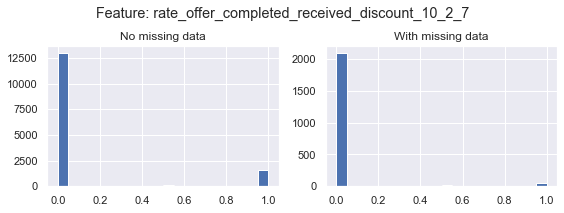

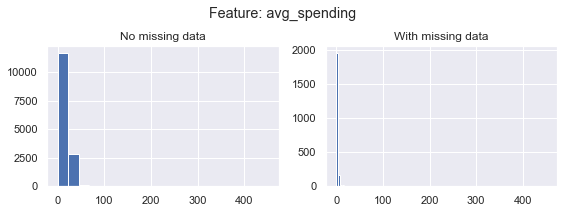

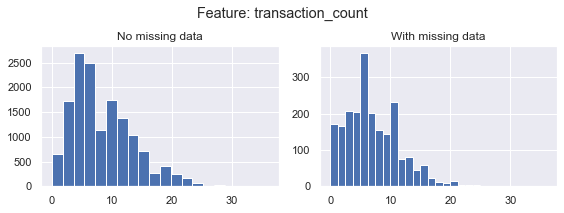

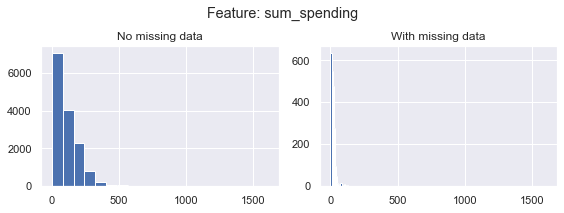

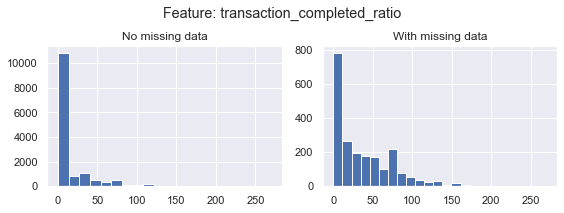

In [63]:
cols_to_compare = profile_updated.columns[profile_updated.columns.str.contains("rate")].to_list() +\
                  ['avg_spending', 'transaction_count', 'sum_spending','transaction_completed_ratio']

for col in cols_to_compare:
    dist_compare_cont(col,profile_updated_)
    

Plots for data with and without missing are quite different, so we will kepp them seperate when doing clustering

In [64]:
"""seperate data with age <100 and age >= 100"""
profile_updated_main = profile_updated_[profile_updated_.age <100]

profile_updated_special = profile_updated_[profile_updated_.age >= 100]
profile_updated_special = profile_updated_special.drop(['gender', 'age', 'income'], axis = 1)



### Profile with valid and invaild offer completed transacript
- Profile_valid = people who was influenced by offering
- Profile_invalid = people who was not influenced by offering( value > 0, which means how many transaction they made as invaild offer completed without viewed

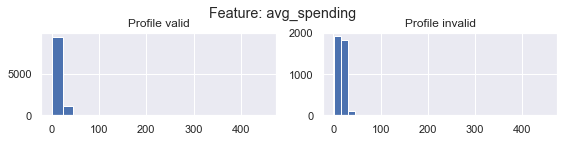

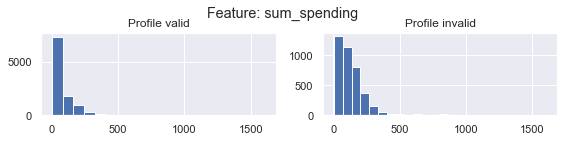

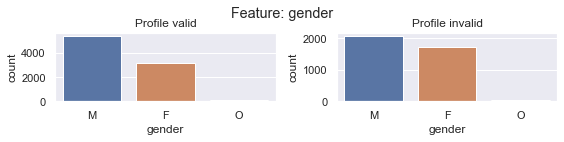

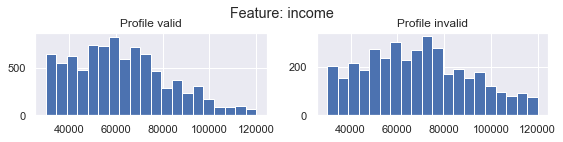

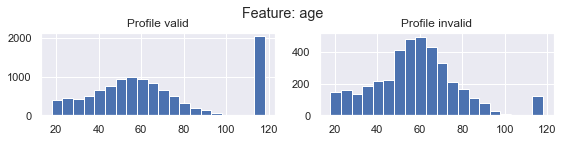

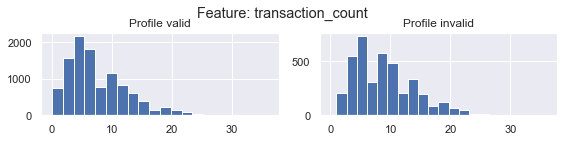

In [65]:
profile_invalid = profile_updated[profile_updated.invalid == 1]
profile_valid = profile_updated[profile_updated.invalid == 0]


cols_to_compare = [ 'avg_spending','sum_spending', 'gender','income', 'age', 'transaction_count']

for col in cols_to_compare:
    f, (ax1,ax2) = plt.subplots(1,2, figsize=(8,2), sharex=True)
    if col == 'gender':
        ax1 = sns.countplot(col, data=profile_valid, ax=ax1, order=['M','F', 'O'])
        ax2 = sns.countplot(col, data=profile_invalid, ax=ax2, order=['M','F', 'O'])
    else:
        ax1 = profile_valid[col].hist(ax=ax1, bins=20)
        ax2 = profile_invalid[col].hist( ax=ax2, bins=20)
    ax1.set_title('Profile valid')
    ax2.set_title('Profile invalid')
    f.suptitle('Feature: ' + col)
    f.tight_layout()
    f.subplots_adjust(top=0.8)

For the invaild profile:
- Gender: female are larege than valid
- Spending: larger than valid
- Income: slight higher than valid

In [66]:
def profile_parse_dates(profile_df):
    profile_df = profile_df.copy()

    #convert to string
    profile_df['became_member_on'] = profile_df.became_member_on.apply(lambda x: str(x))
    #convert to datetime format
    profile_df['became_member_on'] = pd.to_datetime(profile_df.became_member_on)
    return profile_df


profile_updated_main = profile_parse_dates(profile_updated_main)
profile_updated_special =profile_parse_dates(profile_updated_special)

In [67]:
import datetime

for df in [profile_updated_main, profile_updated_special]:
    df.loc[:,'member_days_since'] = (datetime.datetime(2020,12,31) - df.became_member_on).dt.days 
    df.loc[:,'member_year'] = df.became_member_on.dt.year.astype(str)
    
profile_updated_main = profile_updated_main.drop('became_member_on', axis = 1)
profile_updated_special = profile_updated_special.drop('became_member_on', axis = 1)

In [68]:
profile_updated_main.head()

Unnamed: 0 gender  age    income  \
1   0610b486422d4921ae7d2bf64640c50b      F   55  112000.0   
3   78afa995795e4d85b5d9ceeca43f5fef      F   75  100000.0   
5   e2127556f4f64592b11af22de27a7932      M   68   70000.0   
8   389bc3fa690240e798340f5a15918d5c      M   65   53000.0   
12  2eeac8d8feae4a8cad5a6af0499a211d      M   58   51000.0   

    offer received_bogo_10_10_7  offer received_bogo_10_10_5  \
1                           0.0                          0.0   
3                           1.0                          0.0   
5                           0.0                          0.0   
8                           0.0                          0.0   
12                          0.0                          0.0   

    offer received_informational_0_0_4  offer received_bogo_5_5_7  \
1                                  1.0                        1.0   
3                                  0.0                        1.0   
5                                  1.0                        1.0   
8                                  0.0                        2.0   
12                                 1.0                        0.0   

    offer received_discount_20_5_10  offer received_discount_7_3_7  ...  \
1                               0.0                            0.0  ...   
3                               0.0                            0.0  ...   
5                               0.0                            0.0  ...   
8                               0.0                            0.0  ...   
12                              0.0                            1.0  ...   

    rate_offer_viewed_informational_0_0_3  rate_offer_viewed_bogo_5_5_5  \
1                                     0.0                           0.0   
3                                     1.0                           1.0   
5                                     0.0                           0.0   
8                                     0.0                           1.0   
12                                    0.0                           0.0   

    rate_offer_completed_viewed_bogo_5_5_5  \
1                                      0.0   
3                                      0.0   
5                                      0.0   
8                                      1.0   
12                                     0.0   

    rate_offer_completed_received_bogo_5_5_5  \
1                                        0.0   
3                                        0.0   
5                                        0.0   
8                                        1.0   
12                                       0.0   

    rate_offer_viewed_discount_10_2_7  \
1                                 0.0   
3                                 0.0   
5                                 1.0   
8                                 1.0   
12                                0.0   

    rate_offer_completed_viewed_discount_10_2_7  \
1                                           0.0   
3                                           0.0   
5                                           0.0   
8                                           1.0   
12                                          0.0   

    rate_offer_completed_received_discount_10_2_7  \
1                                             0.0   
3                                             0.0   
5                                             0.0   
8                                             1.0   
12                                            0.0   

    transaction_completed_ratio  member_days_since  member_year  
1                     30.000000               1265         2017  
3                      3.333333               1332         2017  
5                      1.428571                980         2018  
8                      0.588235               1056         2018  
12                     3.636364               1146         2017  

[5 rows x 86 columns]

In [69]:
profile_onehot_main = pd.get_dummies(profile_updated_main)
profile_onehot_special = pd.get_dummies(profile_updated_special)

In [70]:
def separate_profile(profile_updated_df):

    #main profile
    profile_updated_main = profile_updated_df[profile_updated_df.age < 100]

    #special profile
    profile_updated_sp = profile_updated_df[profile_updated_df.age >= 100]
    profile_updated_sp = profile_updated_sp.drop(['gender', 'income', 'age'], axis=1)
    
    return profile_updated_main, profile_updated_sp

In [71]:
def encode_member_day(profile_updated_df):

    profile_updated_df = profile_updated_df.copy()
    profile_updated_df['member_days_since'] = (datetime.datetime(2020,12,31) - profile_updated_df.became_member_on).dt.days 
    profile_updated_df['member_year'] = profile_updated_df.became_member_on.dt.year.astype(str)
    profile_updated_df = profile_updated_df.drop('became_member_on', axis=1)
    return profile_updated_df


In [72]:
def feature_preprocessing(profile_updated_df, transcript_all_df, portfolio_df):

    #drop features that have more than 50% missing values
    col_null = profile_updated_df.isnull().sum()
    col_null_frac = col_null / profile_updated_df.shape[0]
    cols_to_drop = col_null_frac[col_null_frac > 0.5].index.tolist()
    profile_updated_df = profile_updated_df.drop(cols_to_drop, axis=1)
    
    # remove row data that have age > 100 years, missing values on income and gender
    profile_updated_main, profile_updated_sp = separate_profile(profile_updated_df)
    
    # re-encode became_member_on to member_day (how may days since become member from 31 dec 2018)
    profile_updated_clean = encode_member_day(profile_updated_main)
    profile_updated_sp = encode_member_day(profile_updated_sp)
    
    # one-hot the categorical features
    profile_onehot_main = pd.get_dummies(profile_updated_clean)
    profile_onehot_sp = pd.get_dummies(profile_updated_sp)

    return profile_onehot_main, profile_onehot_sp

In [73]:
profile_dummy = h.feature_extraction(transcript_clean,transcript_all,profile, portfolio)


The profile_updated.csv file is available at local folder.


In [74]:
profile_main, profile_sp = feature_preprocessing(profile_dummy, transcript_all, portfolio)


### EDA

Text(0.5, 1.0, 'Profile Main Feature Correlation')

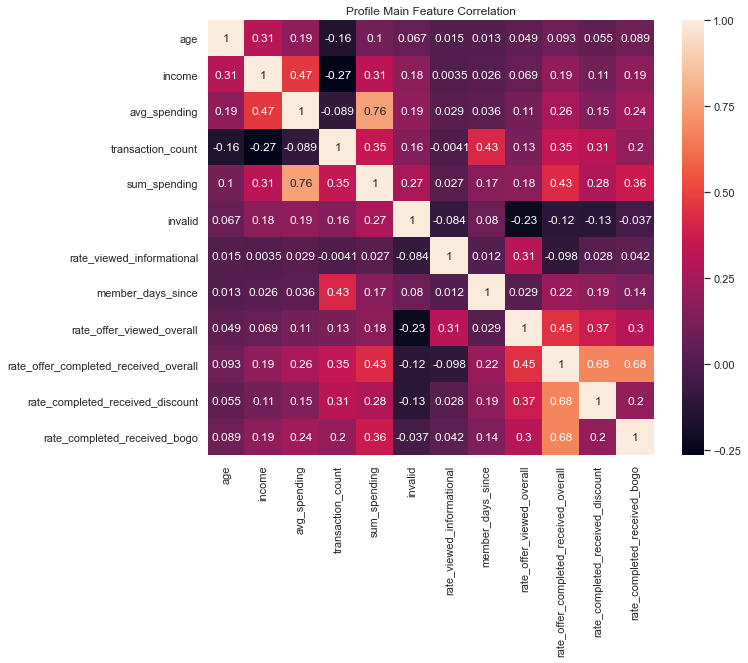

In [75]:

cols = ['age', 'income',  'avg_spending', 'transaction_count', 'sum_spending', 'invalid','rate_viewed_informational',
        'member_days_since',  'rate_offer_viewed_overall','rate_offer_completed_received_overall',
       'rate_completed_received_discount', 'rate_completed_received_bogo']
plt.figure(figsize = (10,8))
sns.heatmap(profile_main[cols].corr(), annot=True)
plt.title("Profile Main Feature Correlation")

- income is positively correlated with 'avg_spending', "sum_spending" and 'age'
- invalid profile is positively correlated with income, avg&sum_spending, but negatively correlated with 'rate_offer_viewed_overall'. These people are likely keep buying when they didn't received offer.

Text(0.5, 1.0, 'Profile Special - Features Correlation')

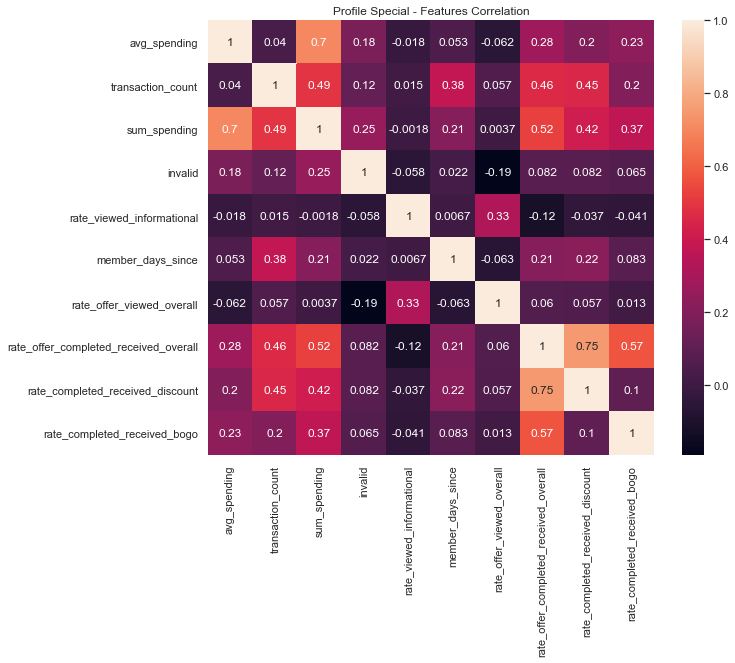

In [76]:
cols_sp = ['avg_spending', 'transaction_count', 'sum_spending', 'invalid','rate_viewed_informational',
        'member_days_since',  'rate_offer_viewed_overall','rate_offer_completed_received_overall',
       'rate_completed_received_discount', 'rate_completed_received_bogo']

f,ax = plt.subplots(figsize=(10,8))
sns.heatmap(profile_sp[cols_sp].corr(), ax=ax, annot=True)
ax.set_title("Profile Special - Features Correlation")

In [77]:

main = profile_main.copy()
special = profile_sp.copy()
main['profile'] = 'main'
special['profile'] = 'special'
merge_df = pd.concat([main, special], axis=0, sort=True)
merge_melt = merge_df[cols_sp + ['profile']].melt(['profile'], var_name='cols',  value_name='vals')

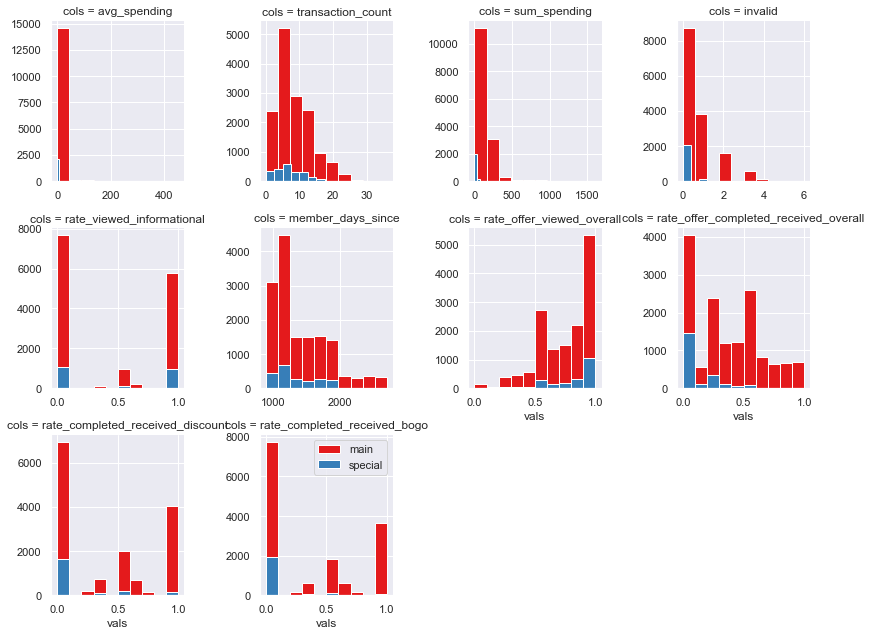

In [78]:
g = sns.FacetGrid(merge_melt, col='cols', hue="profile", palette="Set1",  col_wrap= 4,sharey=False, sharex=False)
g = (g.map(plt.hist, "vals"))
g.axes[-1].legend()
plt.show()

In [79]:
merge_melt

profile                          cols       vals
0          main                  avg_spending  25.670000
1          main                  avg_spending  22.752857
2          main                  avg_spending  19.243333
3          main                  avg_spending  12.143333
4          main                  avg_spending   3.905000
...         ...                           ...        ...
169995  special  rate_completed_received_bogo   1.000000
169996  special  rate_completed_received_bogo   0.000000
169997  special  rate_completed_received_bogo   0.000000
169998  special  rate_completed_received_bogo   0.000000
169999  special  rate_completed_received_bogo   0.000000

[170000 rows x 3 columns]

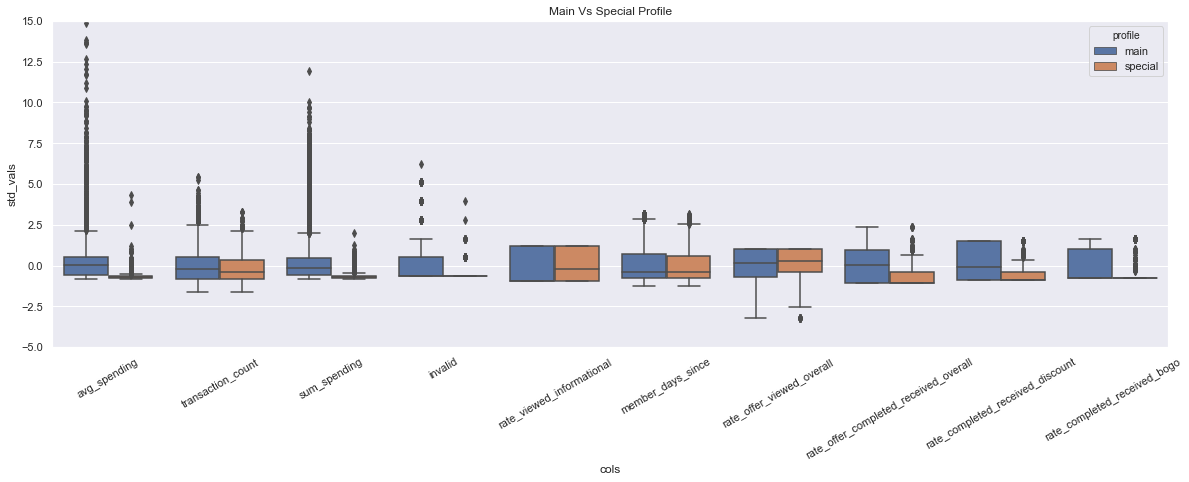

In [80]:
main = profile_main.copy()
special = profile_sp.copy()
main['profile'] = 'main'
special['profile'] = 'special'
merge_df = pd.concat([main, special], axis=0, sort=True)
merge_df_std = (merge_df[cols_sp] - merge_df[cols_sp].mean()) / merge_df[cols_sp].std()
merge_df_std['profile'] = merge_df['profile']
merge_melt = merge_df_std[cols_sp + ['profile']].melt(['profile'], var_name='cols',  value_name='std_vals')


f, ax = plt.subplots(figsize=(20,6))
sns.boxplot('cols','std_vals', hue='profile', data=merge_melt, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30);
ax.set_ylim(-5,15);
ax.set_title('Main Vs Special Profile');



- main & special customer viewed their offer at a quite similar rate
- special customer have a lower amount in avg_spending , sum_spendingd, and rate_complete_received rate.

### valid and invalid in Main Profile

Text(0.5, 1.0, 'Main Profile : Vaild vs Invalid')

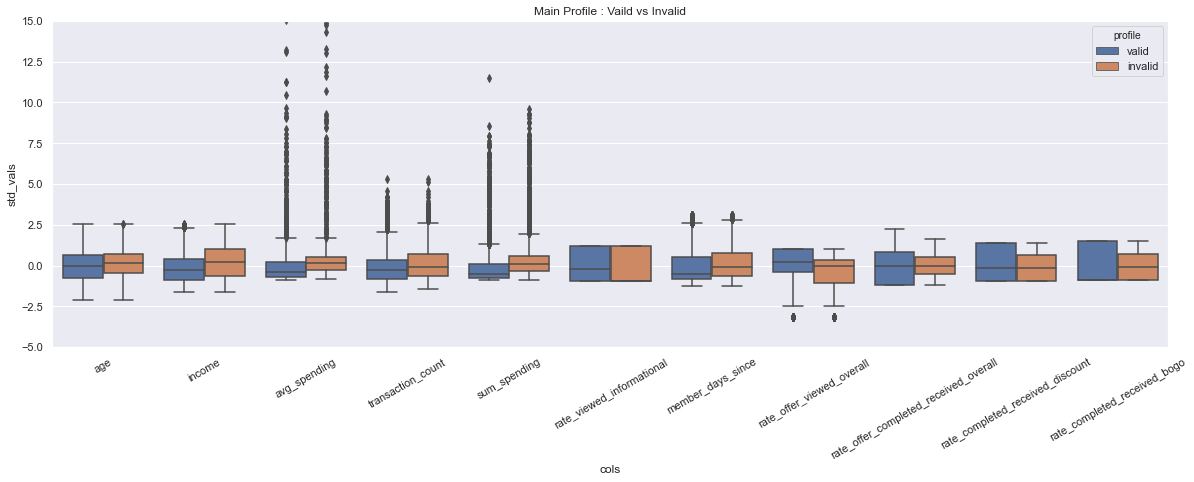

In [81]:
main = profile_main.copy()
main.loc[main.invalid > 0,'profile'] = 'invalid'
main.loc[main.invalid == 0,'profile'] = 'valid'
main_std = (main[cols] - main[cols].mean()) / main[cols].std()
main_std = main_std.drop('invalid', axis=1)
main_std['profile'] = main['profile']


main_melt = main_std.melt(['profile'], var_name = 'cols' , value_name = 'std_vals')

f, ax = plt.subplots(figsize = (20,6))
sns.boxplot( 'cols', "std_vals",hue = 'profile', data = main_melt, ax= ax , hue_order = ['valid', 'invalid'])
ax.set_xticklabels(ax.get_xticklabels(), rotation = 30)
ax.set_ylim(-5, 15)
ax.set_title("Main Profile : Vaild vs Invalid")



In [82]:
main_melt

profile                          cols  std_vals
0       invalid                           age  0.038050
1       invalid                           age  1.192523
2         valid                           age  0.788457
3         valid                           age  0.615286
4         valid                           age  0.211221
...         ...                           ...       ...
162883    valid  rate_completed_received_bogo -0.861042
162884  invalid  rate_completed_received_bogo -0.861042
162885    valid  rate_completed_received_bogo -0.861042
162886  invalid  rate_completed_received_bogo -0.068972
162887  invalid  rate_completed_received_bogo -0.861042

[162888 rows x 3 columns]

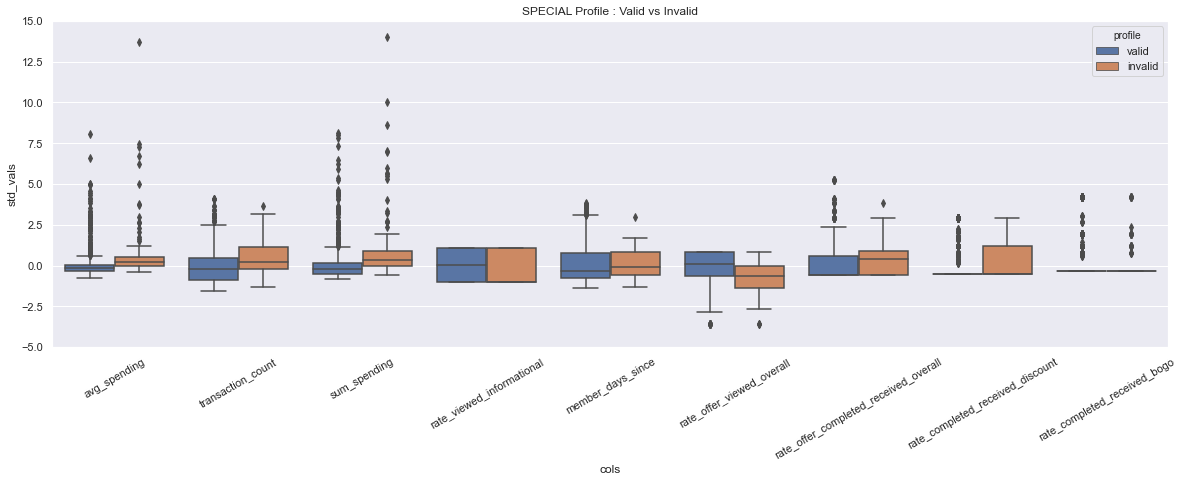

In [83]:
main = profile_sp.copy()
main.loc[main.invalid > 0,'profile'] = 'invalid'
main.loc[main.invalid == 0,'profile'] = 'valid'
main_std = (main[cols_sp] - main[cols_sp].mean()) / main[cols_sp].std()
main_std = main_std.drop('invalid', axis=1)
main_std['profile'] = main['profile']

main_melt = main_std.melt(['profile'], var_name='cols',  value_name='std_vals')


f, ax = plt.subplots(figsize=(20,6))
sns.boxplot('cols','std_vals', hue='profile', data=main_melt, ax=ax, hue_order=['valid', 'invalid'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=30);
ax.set_ylim(-5,15);
ax.set_title("SPECIAL Profile : Valid vs Invalid");

## Feature Transformation



In [84]:
from sklearn.preprocessing import StandardScaler

def perform_scaling(df):
    scaler = StandardScaler()
    std_arr = scaler.fit_transform(df)
    df_std = pd.DataFrame(std_arr, index=df.index, columns= df.columns)
    return df_std, scaler

profile_std_main, scaler_main = perform_scaling(profile_main)
profile_std_sp, scaler_sp = perform_scaling(profile_sp)





In [85]:
# h.save(scaler_main, 'sav/scaler_main.sav')
# h.save(scaler_sp, 'sav/scaler_sp.sav')

In [86]:
from sklearn.decomposition import PCA

pca_main = PCA()
pca_main.fit(profile_std_main)

pca_sp = PCA()
pca_sp.fit(profile_std_sp)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [87]:

def scree_plot(pca):
    '''
    Creates a scree plot associated with the principal components 
    
    INPUT: pca - the result of instantian of PCA in scikit learn
            
    OUTPUT:
            None
    '''
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(20, 10))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)

    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")

Number of Main PCA components that explained at least 95% variance : 34


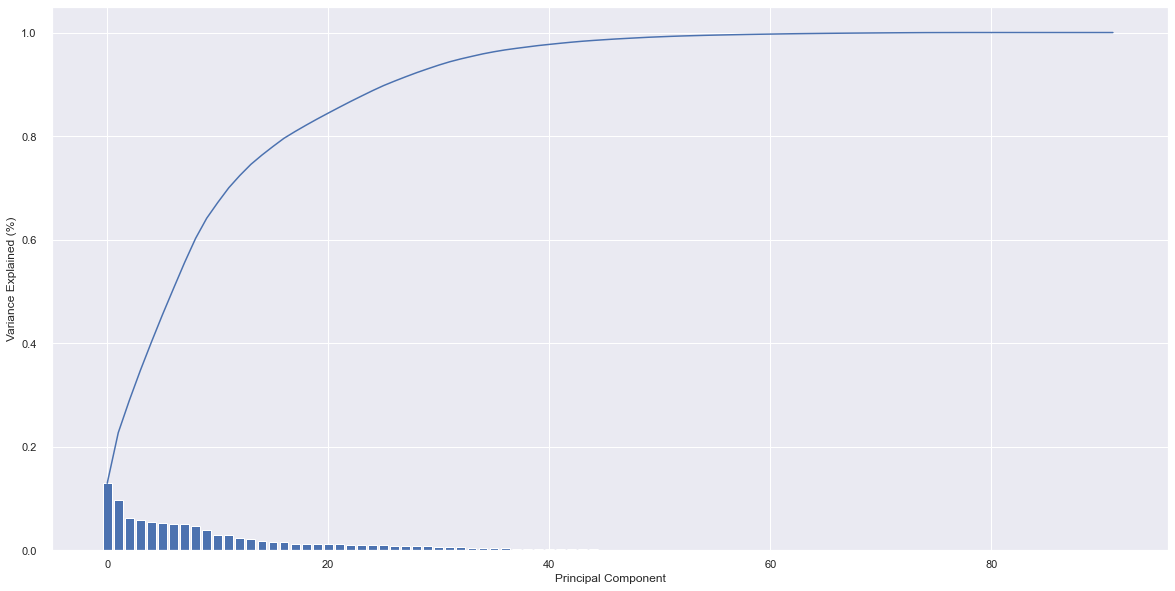

In [88]:
scree_plot(pca_main)
cumvals = np.cumsum(pca_main.explained_variance_ratio_)
print("Number of Main PCA components that explained at least 95% variance : {}".format(np.where(cumvals >= 0.95)[0][0]+1))

Number of Special PCA components that explained at least 95% variance : 29


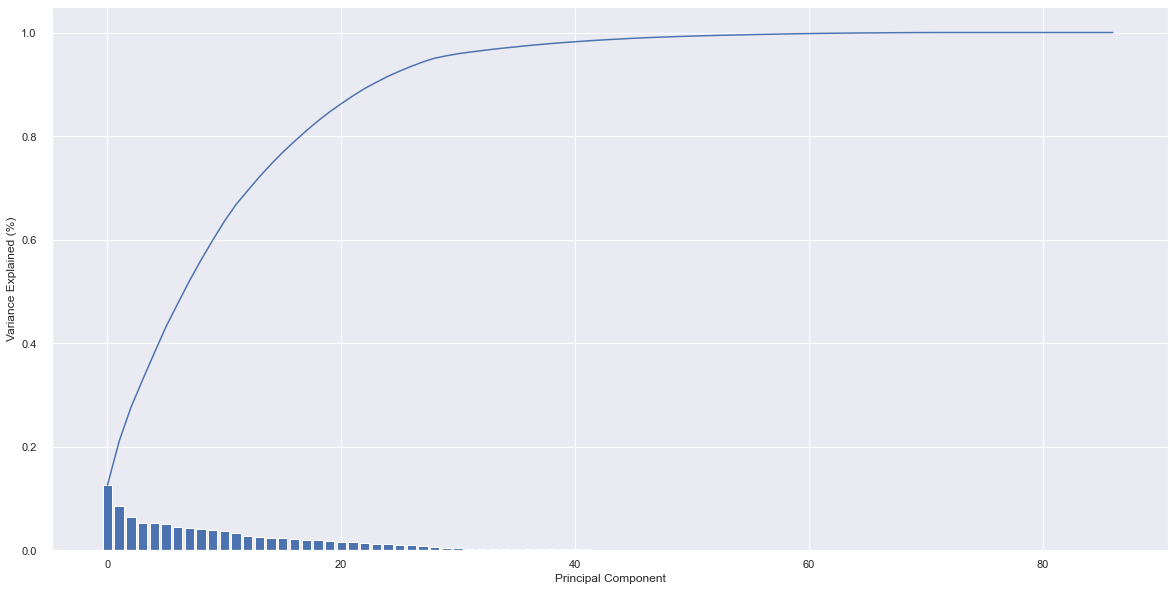

In [89]:

scree_plot(pca_sp)

#PCA
# number of PCA components that explained at least 95% variance ==> 29 components
cumvals = np.cumsum(pca_sp.explained_variance_ratio_)
print("Number of Special PCA components that explained at least 95% variance : {}".format(np.where(cumvals >= 0.95)[0][0]+1))

In [90]:

def pca_fit_transform(df, var = None):
    pca = PCA(var)
    transform_arr = pca.fit_transform(df)
    return pca, transform_arr

pca_main, pca_transform_main = pca_fit_transform(profile_std_main, var=0.95)
pca_sp, pca_transform_sp = pca_fit_transform(profile_std_sp, var=0.95)

### Interpret Principle Componets

Main profile

In [91]:
def plot_weight(df, pca, ith):
    
    sort_pca = sorted([(weight, label) for weight, label in zip(pca.components_[ith-1], df.columns)])
    weights, features = zip(*sort_pca)
    weights, features = list(weights), list(features)
    fig,ax = plt.subplots(figsize = (10, 20))
    
    ax = sns.barplot(weights, features)
    return ax

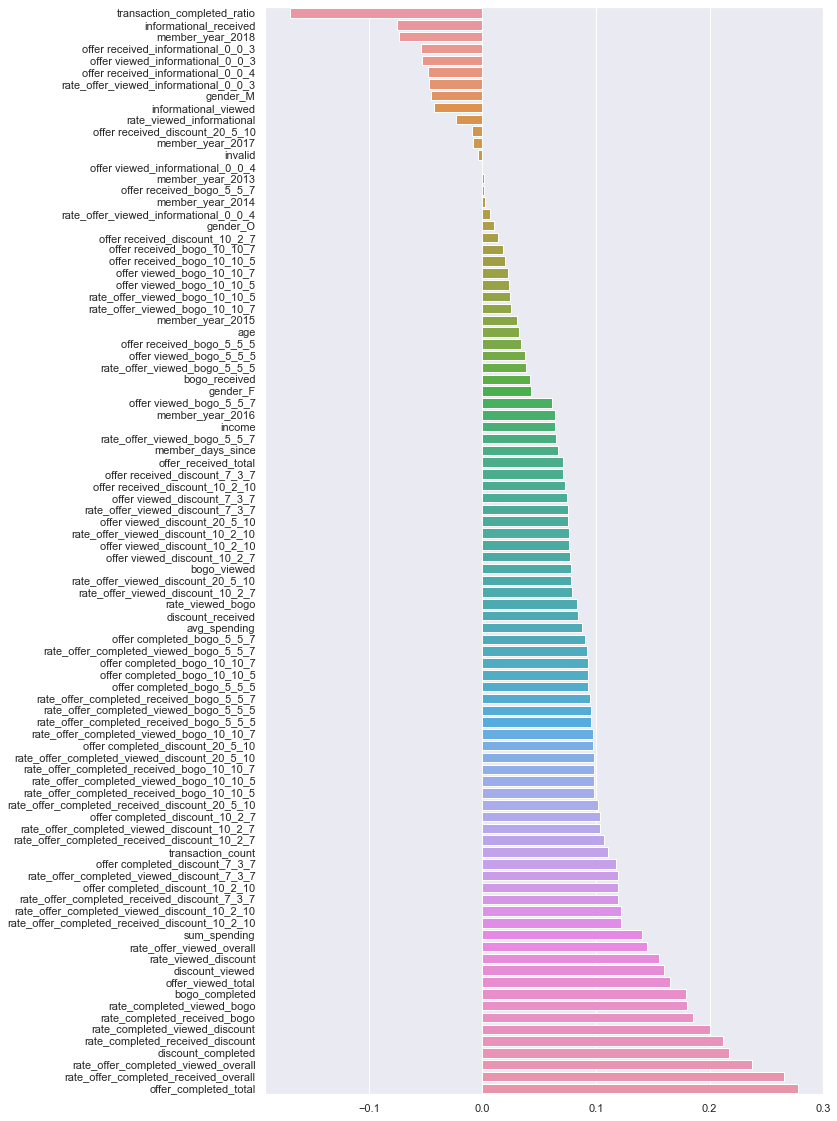

In [92]:
plot_weight(profile_std_main,pca_main, 1)

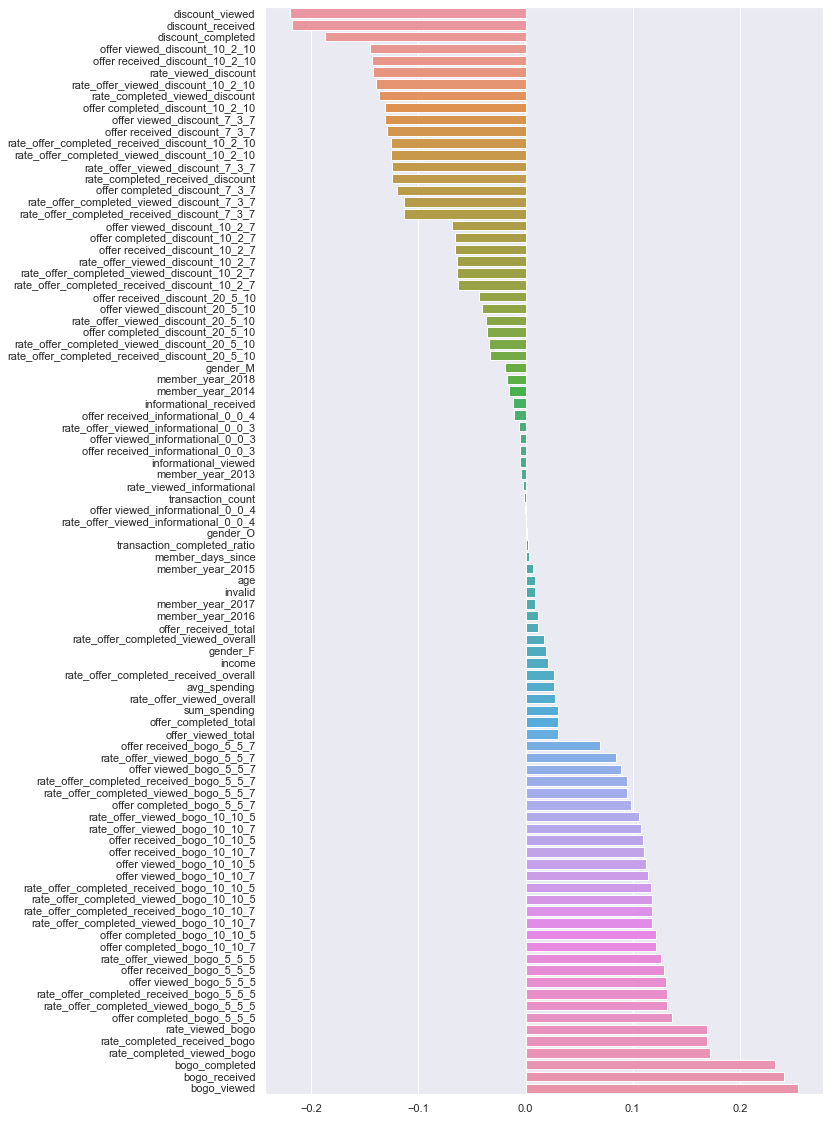

In [93]:
plot_weight(profile_std_main,pca_main, 2 )


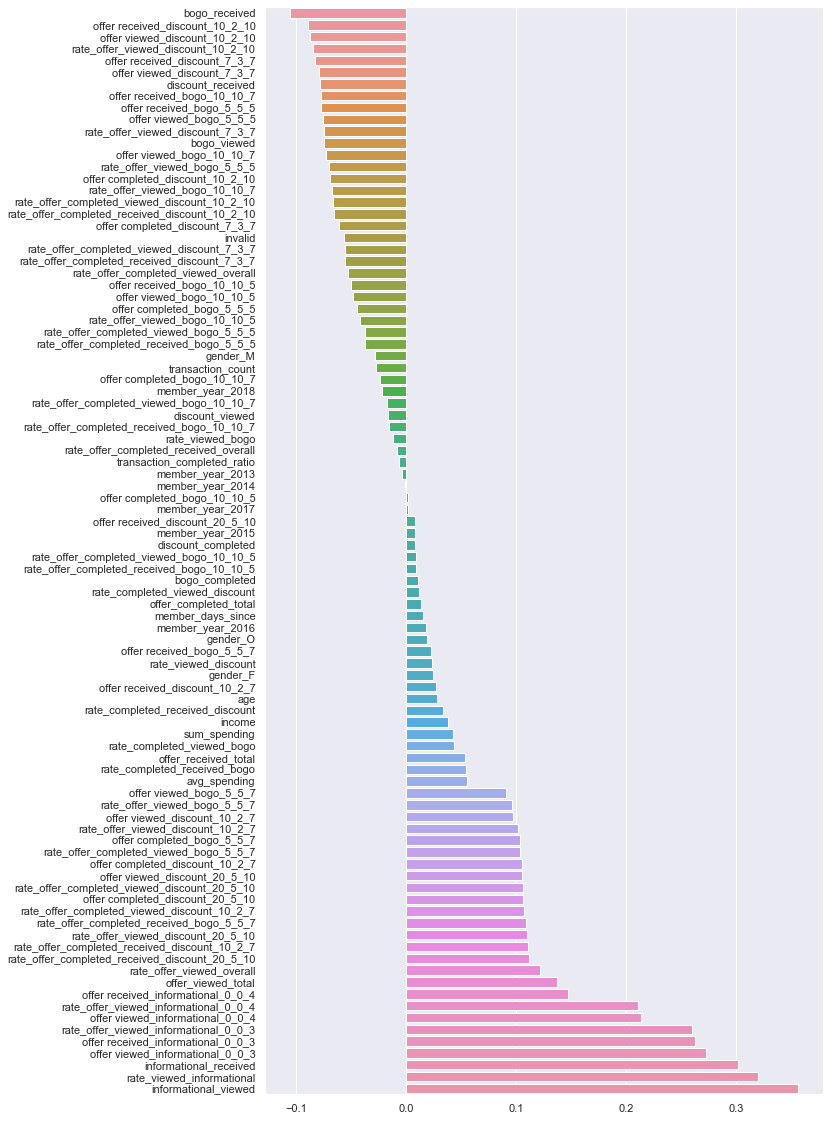

In [94]:
plot_weight(profile_std_main,pca_main, 3 )


Special Profile

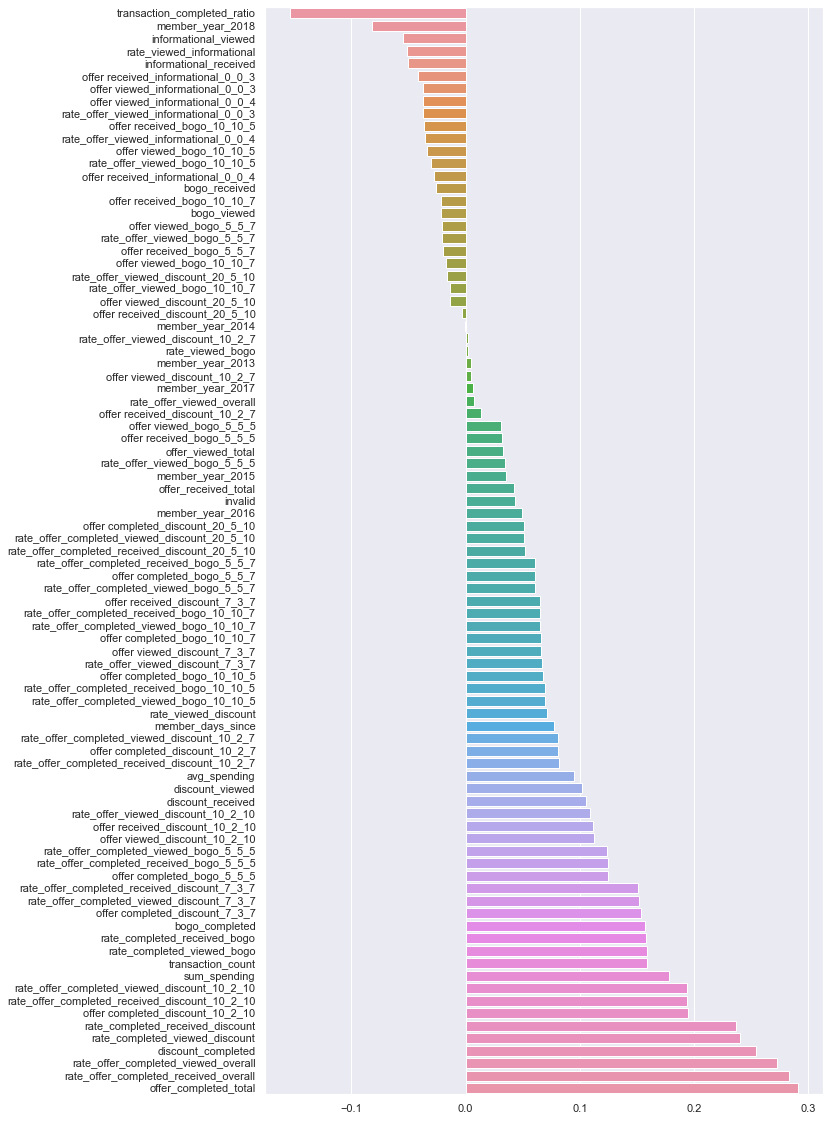

In [95]:
plot_weight(profile_std_sp,pca_sp, 1 )


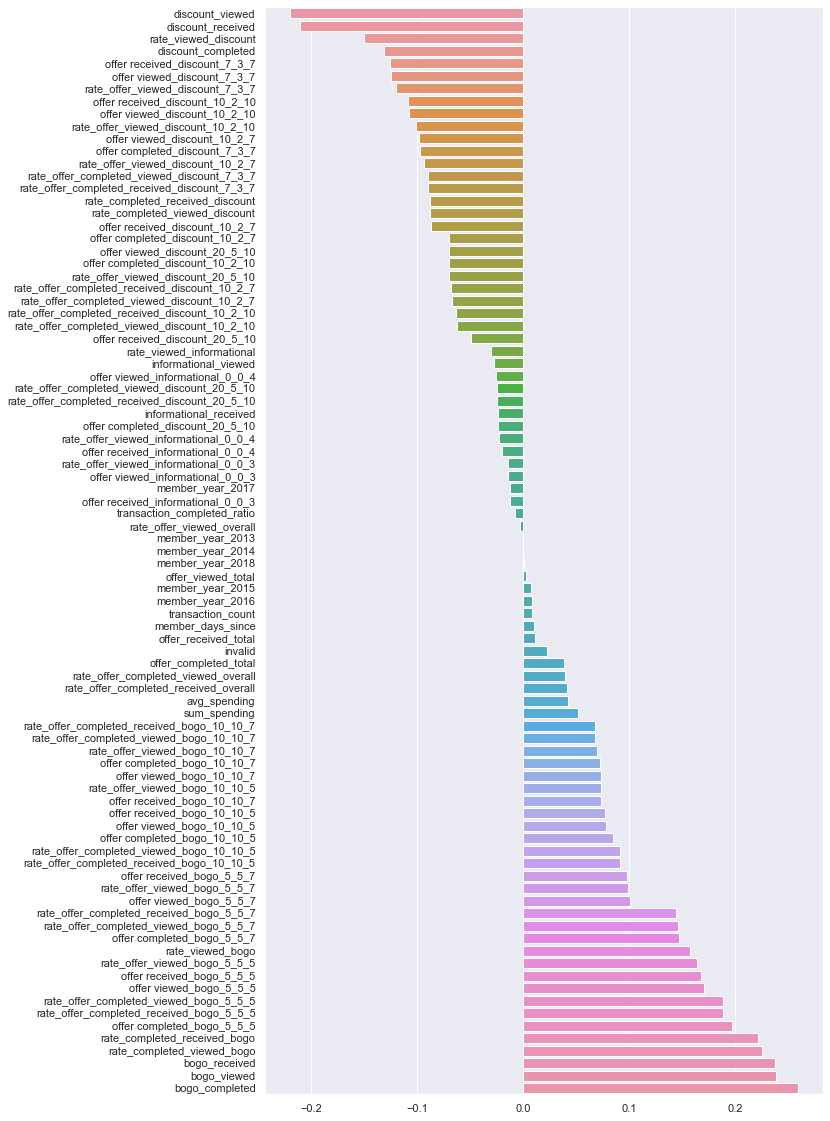

In [96]:
plot_weight(profile_std_sp,pca_sp, 2)


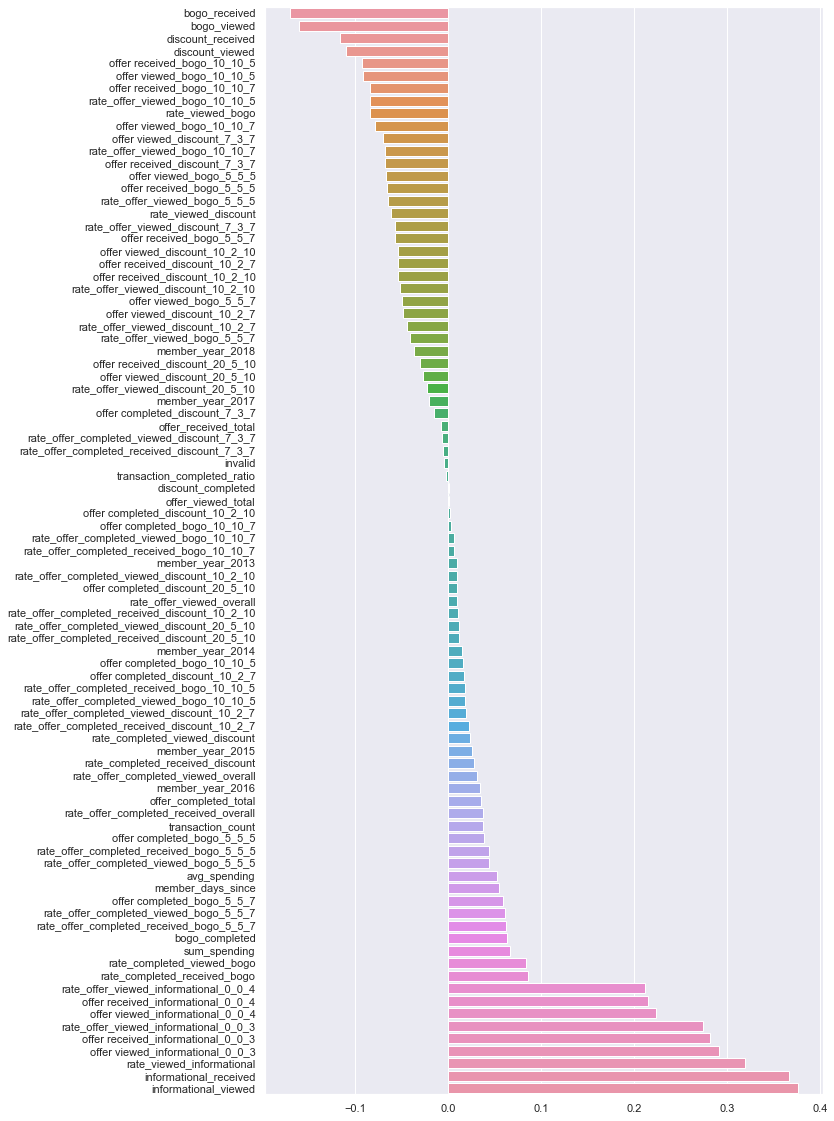

In [97]:
plot_weight(profile_std_sp,pca_sp, 3 )


### Clustering

In [98]:
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import  silhouette_score
from tqdm import tqdm

def finding_num_cluster(X, min_clusters =2, max_clusters =30):
    silh = []
    inertia = []
    clusters = range(min_clusters,max_clusters)
    for n in tqdm(clusters):

        model = KMeans(n_clusters = n, random_state=42)
        preds = model.fit_predict(X)

        silhouette_avg = silhouette_score(X, preds)

        silh.append(silhouette_avg)
        inertia.append(model.inertia_)

    fig, (ax1,ax2) = plt.subplots(2,1, sharex=False, figsize=(8,7))
    ax1.plot(clusters, silh,marker="o")
    ax1.set_ylabel("Silhoutte Score")
    ax1.set_xlabel('number of clusters')
    ax2.plot(clusters, inertia, marker="o")
    ax2.set_ylabel("Inertia (SSE)")
    ax2.set_xlabel("number of clusters")
    plt.show()
"""We choose the elbow where sihoutte score still high while SSE is low """

'We choose the elbow where sihoutte score still high while SSE is low '

100%|██████████| 28/28 [02:48<00:00,  6.02s/it]


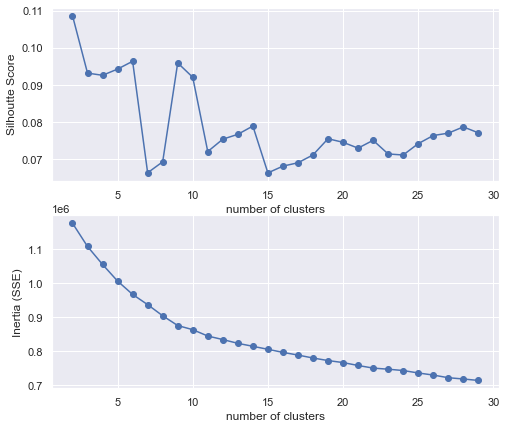

'number of 6, 11 and 15 can be chosen as num of cluster'

In [99]:
finding_num_cluster(pca_transform_main)
"""number of 6, 11 and 15 can be chosen as num of cluster"""

100%|██████████| 28/28 [00:14<00:00,  1.99it/s]


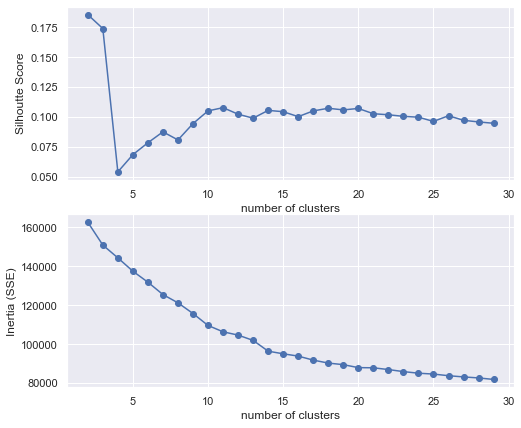

'number of 4 can be chosen as the number of KMean Cluster'

In [100]:
finding_num_cluster(pca_transform_sp)
"""number of 4 can be chosen as the number of KMean Cluster"""

### Perform K-Means clustering

In [101]:
kmeans_main = KMeans(n_clusters= 11, random_state=42)
preds_main = kmeans_main.fit_predict(pca_transform_main)

In [102]:

kmeans_sp = KMeans(n_clusters = 12, random_state=42)
preds_sp = kmeans_sp.fit_predict(pca_transform_sp) 

In [103]:

profile_cluster_main = profile_main.copy()
profile_cluster_sp = profile_sp.copy()


In [104]:
profile_cluster_main['cluster'] = preds_main
profile_cluster_sp['cluster'] = preds_sp


In [105]:
profile_std_main = scaler_main.transform(profile_main)
profile_std_sp = scaler_sp.transform(profile_sp)

In [106]:
profile_cluster_main.to_csv("data/main_cluster.csv")
profile_cluster_sp.to_csv("data/sp_cluster.csv")

Text(0.5, 1.0, 'Special Profile data')

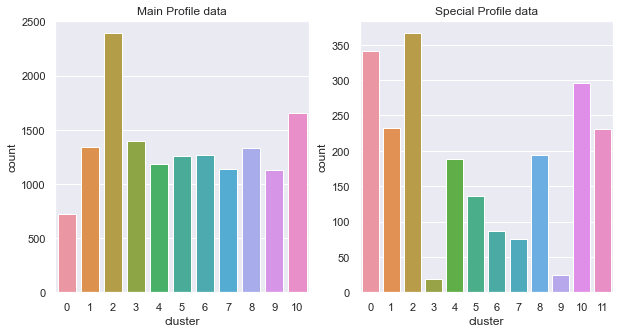

In [107]:
f, (ax1, ax2) = plt.subplots(1,2 ,figsize = (10, 5))
sns.countplot(profile_cluster_main['cluster'], ax = ax1)
sns.countplot(profile_cluster_sp['cluster'], ax = ax2)
ax1.set_title("Main Profile data")
ax2.set_title("Special Profile data")



### Cluster Analysis on Main Data

In [108]:
from sklearn.manifold import TSNE


tsne = TSNE(random_state=42).fit_transform(pca_transform_main)



Text(0.5, 1.0, 'Main Profile Cluster with TSNE')

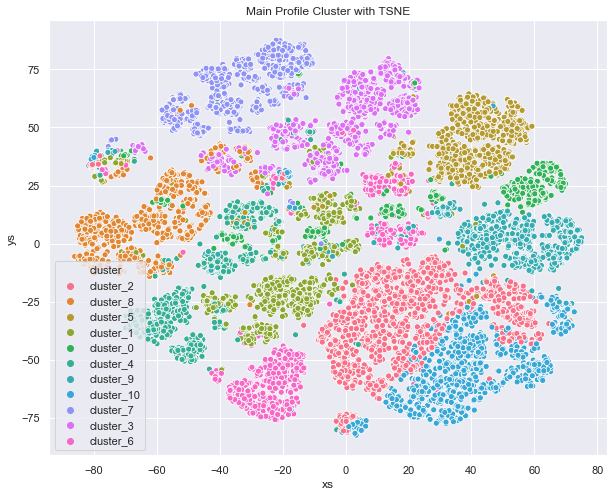

In [109]:
tsne_df = pd.DataFrame(tsne, columns=['xs', 'ys'])
tsne_df['cluster'] = ['cluster_' + str(i) for i in preds_main]
f,ax = plt.subplots(figsize=(10,8))
sns.scatterplot('xs','ys', hue='cluster', data=tsne_df, ax=ax)
ax.set_title("Main Profile Cluster with TSNE")


In [110]:
def inverse_transform_centroid(df, kmeans, pca, scalar):
    centers = kmeans.cluster_centers_
    centers_pca = pca.inverse_transform(centers)
    centers = scalar.inverse_transform(centers_pca)
    
    centers = pd.DataFrame(centers, columns= df.columns)
    return centers

In [111]:

pd.set_option('display.max_columns', 500)
profile_main_centroid = inverse_transform_centroid(profile_main, kmeans_main, pca_main, scaler_main)
profile_main_centroid

age        income  offer received_bogo_10_10_7  \
0   54.934076  68498.386845                     0.319379   
1   57.307204  72443.925350                     0.392715   
2   52.057442  60009.097814                     0.482729   
3   55.498752  68350.021842                     0.338981   
4   55.282017  69320.846263                     1.365586   
5   53.538449  62352.534903                     0.333219   
6   54.277336  65439.365523                     0.272292   
7   56.785486  70194.446008                     0.377700   
8   55.542992  68341.326848                     0.389645   
9   52.497143  60714.642560                     0.345573   
10  52.600519  60616.988110                     0.348916   

    offer received_bogo_10_10_5  offer received_informational_0_0_4  \
0                      0.323458                            0.291531   
1                      1.332081                            0.458115   
2                      0.467538                            0.533237   
3                      0.386043                            0.423826   
4                      0.250459                            0.427036   
5                      0.327684                            0.464251   
6                      0.242182                            0.442551   
7                      0.365522                            0.374805   
8                      0.398375                            0.370925   
9                      0.326280                            0.493328   
10                     0.351929                            0.502332   

    offer received_bogo_5_5_7  offer received_discount_20_5_10  \
0                    0.215401                         0.248477   
1                    0.295095                         0.349585   
2                    0.508008                         0.593639   
3                    0.334174                         0.306347   
4                    0.289031                         0.315807   
5                    0.348580                         0.387609   
6                    0.309776                         0.382410   
7                    0.379093                         1.260985   
8                    1.326448                         0.274633   
9                    0.361515                         0.370719   
10                   0.406750                         0.399301   

    offer received_discount_7_3_7  offer received_discount_10_2_10  \
0                        1.315082                         1.239641   
1                        0.309358                         0.334304   
2                        0.330970                         0.337826   
3                        0.398718                         0.388700   
4                        0.328050                         0.321041   
5                        0.147299                         1.360934   
6                        0.360843                         0.320824   
7                        0.387911                         0.365847   
8                        0.383286                         0.349307   
9                        1.366483                         0.133259   
10                       0.247013                         0.248945   

    offer received_informational_0_0_3  offer received_bogo_5_5_5  \
0                             0.286518                   0.328534   
1                             0.439195                   0.350456   
2                             0.038378                   0.408050   
3                             0.428685                   0.345813   
4                             0.388204                   0.496784   
5                             0.455016                   0.236397   
6                             0.446908                   1.343126   
7                             0.382478                   0.379631   
8                             0.439901                   0.427764   
9                             0.429643                   0.285287   
10                            1.239031     

In [112]:
profile_main_centroid_std = (profile_main_centroid - profile_main_centroid.mean()) / profile_main_centroid.std()


In [113]:
def compare_features(df, features, xlabel = 'cluster', ylabel = 'std value'):
    n_cols = len(features)
    rows = n_cols//2 + (n_cols % 2 > 0)
    
    f,axs = plt.subplots(rows, 2, figsize= (10,8))
    axs = axs.flatten()
    
    
    for i in range(n_cols):
        sns.barplot(df.index, features[i], data = df, ax =axs[i])
        axs[i].set_xlabel(xlabel)
        axs[i].set_ylabel(ylabel)
        axs[i].set_title("Feature : " + features[i])
        
    plt.tight_layout()

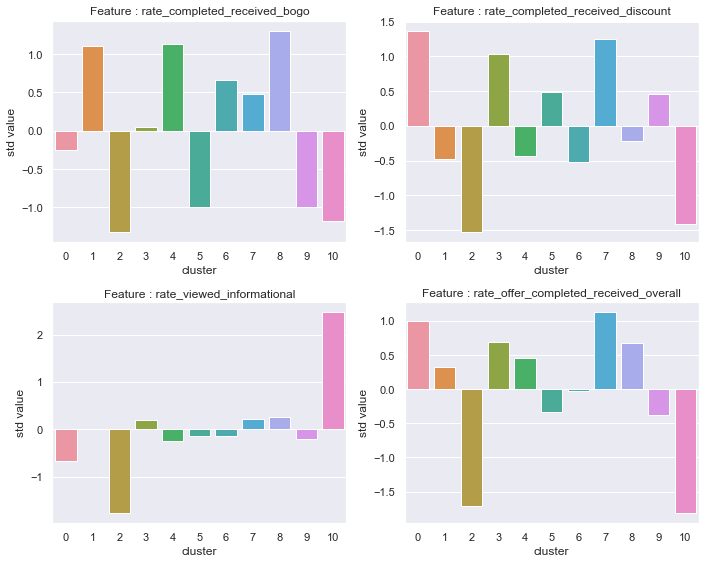

In [114]:
"""For all the offer type"""
features = [
    'rate_completed_received_bogo',
    'rate_completed_received_discount',
    'rate_viewed_informational',  'rate_offer_completed_received_overall']

compare_features(profile_main_centroid_std, features)

### Response Cluster
- For all completed offer: cluster 0,1,3,4,7,8
- For **BOGO** offer: cluster 1,4,6,7,8
- For **Discount**: 0,3,5,7,9
- For **Information** 10

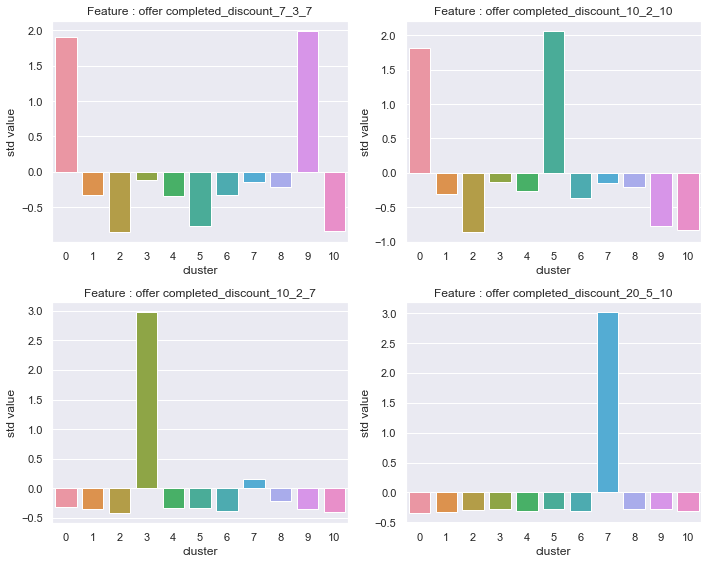

In [115]:
"""For DISCOUNT"""
features = [
    'offer completed_discount_7_3_7',
    'offer completed_discount_10_2_10',
    'offer completed_discount_10_2_7',
    'offer completed_discount_20_5_10']

compare_features(profile_main_centroid_std, features)

### DISCOUNT Cluster
- **Cluster 0, 9** response sensetive to discount 7
- **Cluster 0,5,3** response sensetive to discount 10
- **Clusetr 7** respone sensetive to dicount 7

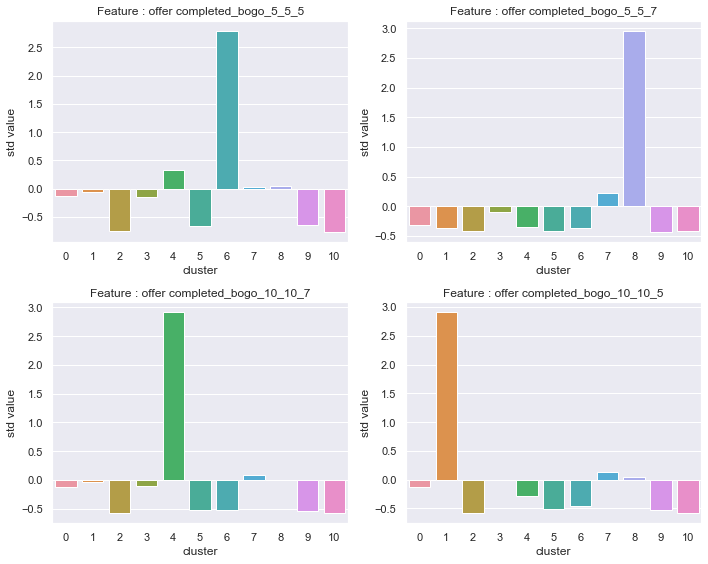

In [116]:
"""BOGO Discount"""
features = [
    'offer completed_bogo_5_5_5',
    'offer completed_bogo_5_5_7',
    'offer completed_bogo_10_10_7',
    'offer completed_bogo_10_10_5'   
]

compare_features(profile_main_centroid_std, features)

### BOGO Cluster
- **Cluster 6,8** response sensetive TO lower BOGO, **Cluster 4, 7** response lower sensetive to that.
- **Cluster 1,4** response sensetive to higher BOGO


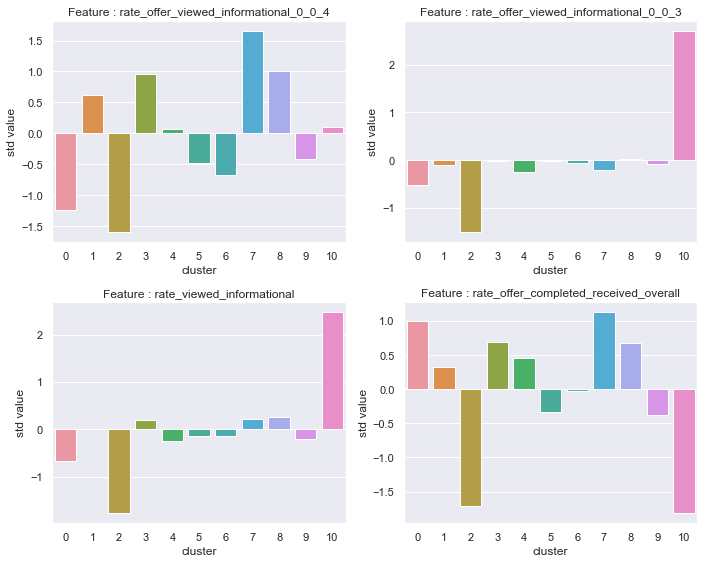

In [117]:
"""Informational discount"""
features= ['rate_offer_viewed_informational_0_0_4',
     'rate_offer_viewed_informational_0_0_3',  'rate_viewed_informational','rate_offer_completed_received_overall']

compare_features(profile_main_centroid_std, features)

### INFORMATIONAL Cluster
- **Cluster 1,3,7,8,10** response sensetive TO lower INFO, **Cluster 4, 7** response lower sensetive to that.
- **Cluster 1,4** response sensetive to higher INFO


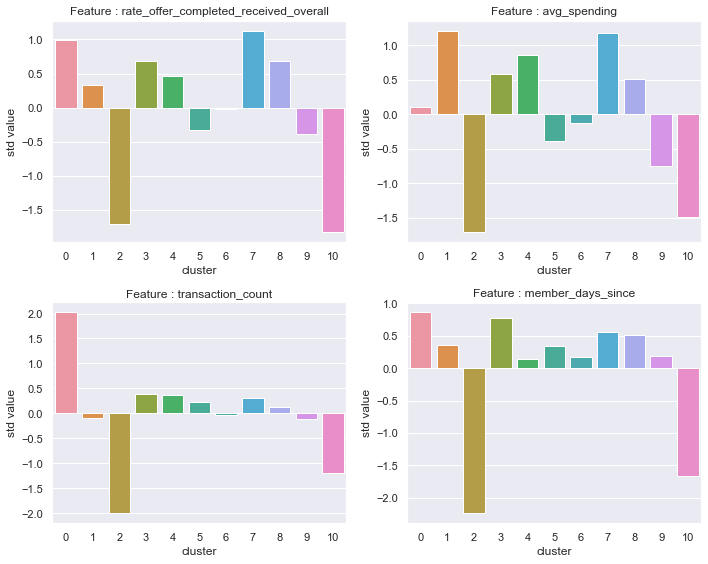

In [121]:

features= ['rate_offer_completed_received_overall',  'avg_spending',
           'transaction_count','member_days_since' ]

compare_features(profile_main_centroid_std, features)

In [128]:
genders = ['gender_F','gender_M', 'gender_O']
gender_df = profile_cluster_main[['gender_F','gender_M', 'gender_O', 'cluster']]#.idxmax(axis=1)#.shape
gender_df['gender'] = gender_df[genders].idxmax(axis=1)
gender_df = gender_df.drop(genders, axis=1)

C:\Users\Xwt\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [129]:
members = profile_cluster_main.columns[profile_cluster_main.columns.str.contains('member_year')].tolist()
member_df = profile_cluster_main[members + ['cluster']]#.idxmax(axis=1)#.shape
member_df['member_year'] = member_df[members].idxmax(axis=1)
member_df = member_df.drop(members, axis=1)

C:\Users\Xwt\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Member Year Distribution')

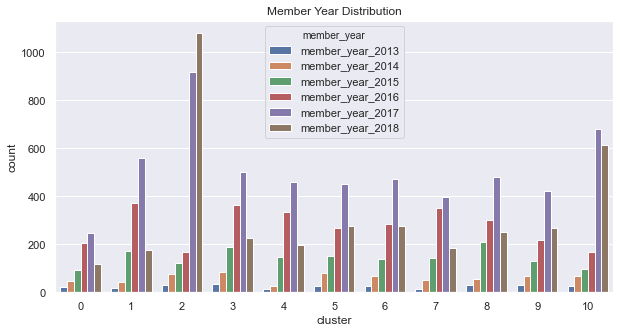

In [135]:
f,ax = plt.subplots(figsize = (10,5))
sns.countplot("cluster", hue = 'member_year',data = member_df, hue_order = ['member_year_'+ str(i) for i in range(2013,2019,1)])
ax.set_title("Member Year Distribution")


### Cluster Analysis on Special Profile 

In [136]:
tsne = TSNE(random_state=42).fit_transform(pca_transform_sp)

Text(0.5, 1.0, 'Special Profile Data Cluster with TSNE')

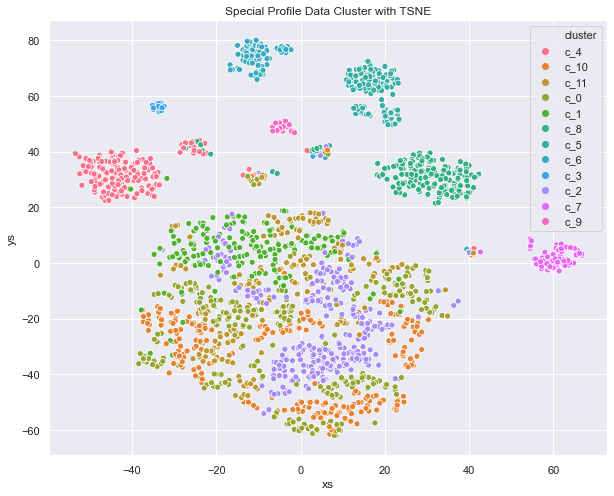

In [143]:
tsne_df = pd.DataFrame(tsne, columns = ['xs', 'ys'])
tsne_df['cluster'] = ['c_' + str(i) for i in preds_sp]

f, ax = plt.subplots(figsize = (10,8))
sns.scatterplot('xs', 'ys', hue = 'cluster' ,data = tsne_df)
ax.set_title('Special Profile Data Cluster with TSNE')


In [145]:
pd.set_option('display.max_columns', 500)

profile_sp_centroid = inverse_transform_centroid(profile_sp, kmeans_sp, pca_sp, scaler_sp)
profile_sp_centroid

offer received_bogo_10_10_7  offer received_bogo_10_10_5  \
0                      0.431771                     0.480787   
1                      0.401521                     0.360841   
2                      0.683704                     0.831163   
3                      0.531249                     0.260271   
4                      0.432342                     0.419305   
5                      0.377804                     0.255234   
6                      0.408343                     0.340950   
7                      0.393865                     0.289711   
8                      0.401677                     0.413817   
9                      0.436799                     1.320118   
10                     0.475154                     0.499135   
11                     0.221782                     0.105826   

    offer received_informational_0_0_4  offer received_bogo_5_5_7  \
0                             1.301675                   0.390625   
1                             0.172701                   0.391872   
2                             0.182879                   0.706703   
3                             0.420236                   0.156823   
4                             0.444063                   0.349454   
5                             0.414107                   0.349603   
6                             0.445421                   1.284392   
7                             0.528026                   0.327831   
8                             0.385401                   0.314001   
9                             0.524457                   0.371483   
10                            0.110648                   0.412694   
11                            0.306235                   0.288202   

    offer received_discount_20_5_10  offer received_discount_7_3_7  \
0                          0.333511                       0.259440   
1                          0.395854                       1.373654   
2                          0.329613                       0.109092   
3                          1.354242                       0.693608   
4                          0.374979                       1.276075   
5                          0.444196                       0.336688   
6                          0.434111                       0.408023   
7                          0.331688                       0.338175   
8                          0.391508                       0.277833   
9                          0.284860                       0.318331   
10                         0.381767                       0.261034   
11                         0.894660                       0.196583   

    offer received_discount_10_2_10  offer received_informational_0_0_3  \
0                          0.279816                            0.352851   
1                          0.439927                            0.210146   
2                          0.273492                            0.088238   
3                          0.327346                            0.368616   
4                          0.349453                            0.388285   
5                          0.429353                            0.376776   
6                          0.335018                            0.518639   
7                          0.350734                            0.363574   
8                          1.333089                            0.437864   
9                          0.437756                            0.226951   
10                         0.215573                            1.380575   
11                         0.608222                            0.329559   

    offer received_bogo_5_5_5  offer received_discount_10_2_7  \
0                    0.421923                        0.310139   
1                    0.452550                        0.503827   
2                    0.608322                        0.406266   
3                    0.523672                        0.317875   
4                    0.292926                        0.291564

In [147]:
profile_sp_centroid_std = (profile_sp_centroid - profile_sp_centroid.mean()) / profile_sp_centroid.std()

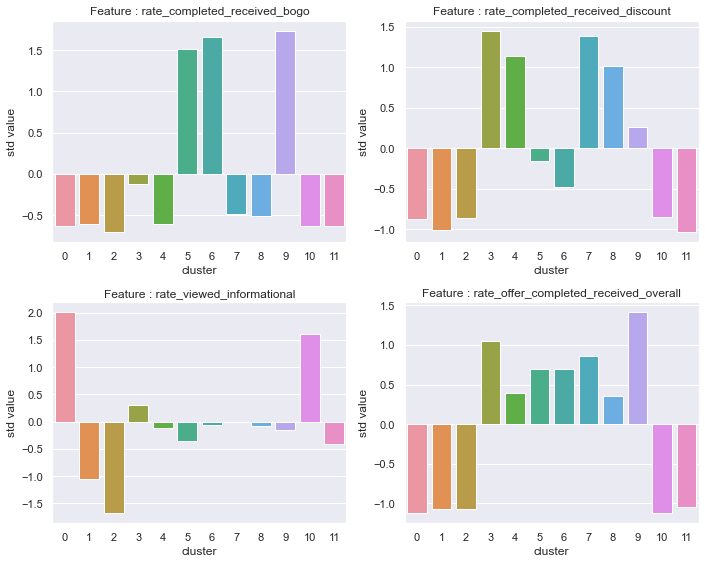

In [148]:
features = [
    'rate_completed_received_bogo',
    'rate_completed_received_discount',
    'rate_viewed_informational',  'rate_offer_completed_received_overall']

compare_features(profile_sp_centroid_std, features)

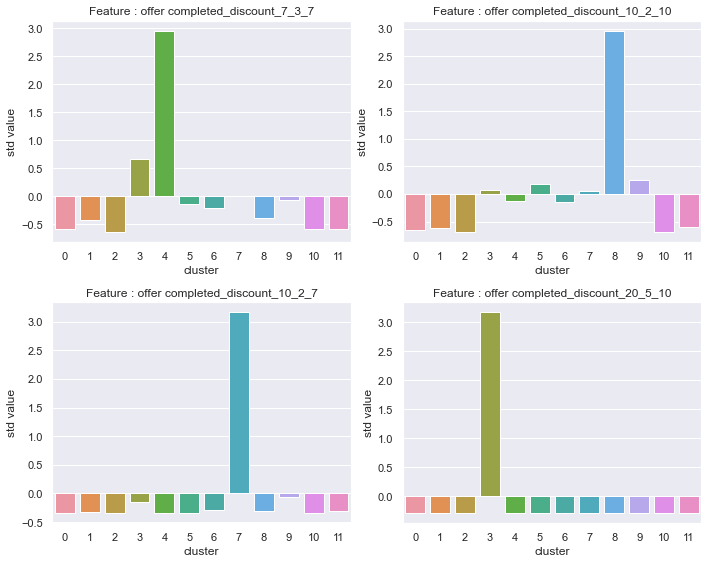

In [150]:
features = [
    'offer completed_discount_7_3_7',
    'offer completed_discount_10_2_10',
    'offer completed_discount_10_2_7',
    'offer completed_discount_20_5_10']

compare_features(profile_sp_centroid_std, features)

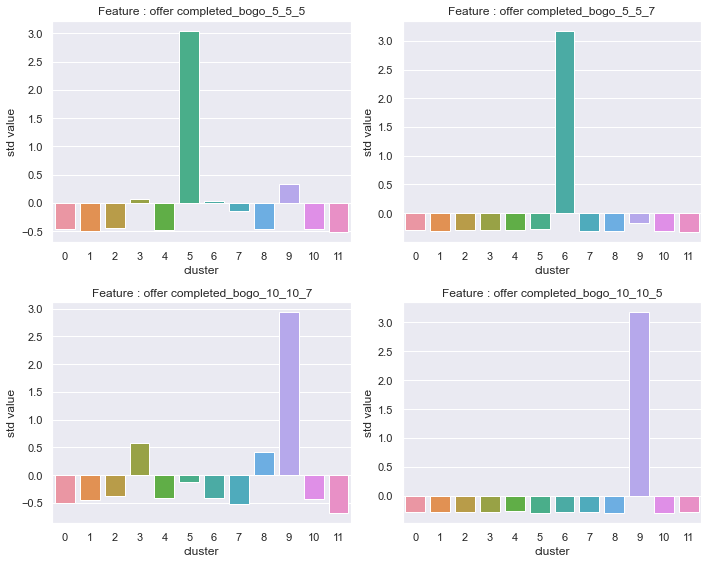

In [152]:
"""BOGO Cluster"""
features= [
    'offer completed_bogo_5_5_5',
    'offer completed_bogo_5_5_7',
    'offer completed_bogo_10_10_7',
    'offer completed_bogo_10_10_5']

compare_features(profile_sp_centroid_std, features)

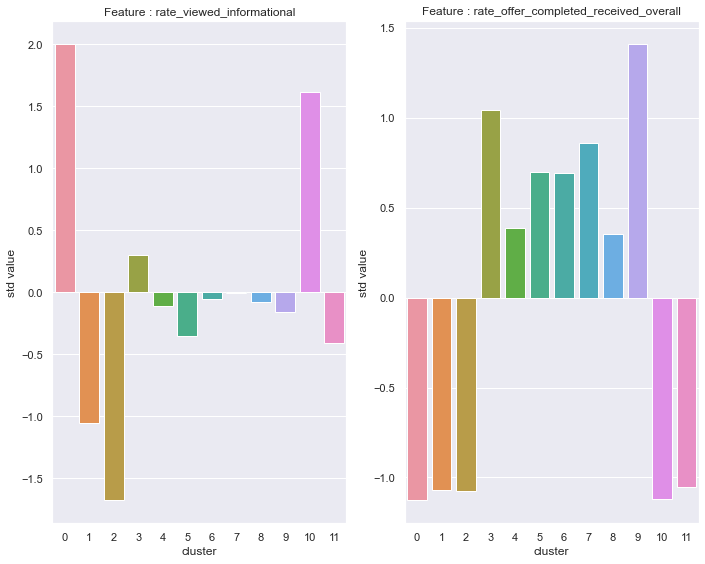

In [154]:
"""INFORMATIONAL Cluster"""

features = [ 'rate_viewed_informational','rate_offer_completed_received_overall']
compare_features(profile_sp_centroid_std, features)

C:\Users\Xwt\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Member Year Distribution')

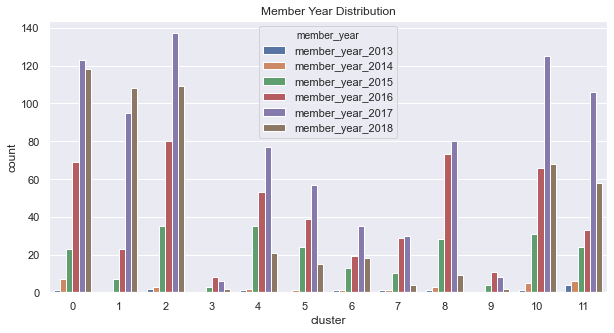

In [166]:
members = profile_cluster_sp.columns[profile_cluster_sp.columns.str.contains("member_year")].tolist()
member_df = profile_cluster_sp[members + ['cluster']]
member_df['member_year'] = member_df[members].idxmax(axis = 1)
member_df = member_df.drop(members, axis = 1)

f, ax = plt.subplots(figsize = (10,5))
sns.countplot("cluster", hue = 'member_year', data = member_df, ax = ax, hue_order = ["member_year_" + str(i) for i in range(2013,2019,1)])

ax.set_title("Member Year Distribution")

In [183]:
def assign_offer_type(profile_cluster, bogos, discounts):
    profile_target_main = profile_cluster.copy()
    
    for bogo in bogos:
        
        subset_5 = (profile_target_main.cluster == bogo) & (profile_target_main.avg_spending  < 5)
        subset_10 = (profile_target_main.cluster == bogo) & (profile_target_main.avg_spending >=5 ) & (profile_target_main.avg_spending <10)
        subset_10_ = (profile_target_main.cluster == bogo) & (profile_target_main.avg_spending >= 10) & \
        (profile_target_main['rate_offer_completed_received_overall'] >=profile_target_main['rate_offer_completed_received_overall'].mean()) & \
        (profile_target_main['transaction_count'] < profile_target_main['transaction_count'].mean())
        
        profile_target_main.loc[subset_5,'bogo_5'] =1
        profile_target_main.loc[subset_10,'bogo_10'] = 1
        profile_target_main.loc[subset_10_, 'bogo_10'] =1
        
    for discount in discounts:
        
        subset_7 = (profile_target_main.cluster == discount) & (profile_target_main.avg_spending <7)
        subset_10 = (profile_target_main.cluster == discount) & (profile_target_main.avg_spending >= 7 ) & (profile_target_main.avg_spending < 10)
        subset_20 = (profile_target_main.cluster == discount) & (profile_target_main.avg_spending >= 10) & (profile_target_main.avg_spending < 20)
        subset_20_ =(profile_target_main.cluster == discount) & (profile_target_main.avg_spending >= 20) & (profile_target_main['rate_offer_completed_received_overall'] >= profile_target_main['rate_offer_completed_received_overall'].mean()) & \
        (profile_target_main['transaction_count'] < profile_target_main['transaction_count'].mean())

        profile_target_main.loc[subset_7, "discount_7"] = 1
        profile_target_main.loc[subset_10, "discount_10"] = 1
        profile_target_main.loc[subset_20, "discount_20"] = 1
        profile_target_main.loc[subset_20_, "discount_20"] = 1

    profile_target_main = profile_target_main.fillna(0)
    
    return profile_target_main
        
        
        
    

In [185]:
bogo = [1,4,6,7,8]
discount = [0,3,5,7,9]
target_main = assign_offer_type(profile_cluster_main, bogo, discount)
target_main.head()

age    income  offer received_bogo_10_10_7  \
Unnamed: 0                                                                     
0610b486422d4921ae7d2bf64640c50b   55  112000.0                          0.0   
78afa995795e4d85b5d9ceeca43f5fef   75  100000.0                          1.0   
e2127556f4f64592b11af22de27a7932   68   70000.0                          0.0   
389bc3fa690240e798340f5a15918d5c   65   53000.0                          0.0   
2eeac8d8feae4a8cad5a6af0499a211d   58   51000.0                          0.0   

                                  offer received_bogo_10_10_5  \
Unnamed: 0                                                      
0610b486422d4921ae7d2bf64640c50b                          0.0   
78afa995795e4d85b5d9ceeca43f5fef                          0.0   
e2127556f4f64592b11af22de27a7932                          0.0   
389bc3fa690240e798340f5a15918d5c                          0.0   
2eeac8d8feae4a8cad5a6af0499a211d                          0.0   

                                  offer received_informational_0_0_4  \
Unnamed: 0                                                             
0610b486422d4921ae7d2bf64640c50b                                 1.0   
78afa995795e4d85b5d9ceeca43f5fef                                 0.0   
e2127556f4f64592b11af22de27a7932                                 1.0   
389bc3fa690240e798340f5a15918d5c                                 0.0   
2eeac8d8feae4a8cad5a6af0499a211d                                 1.0   

                                  offer received_bogo_5_5_7  \
Unnamed: 0                                                    
0610b486422d4921ae7d2bf64640c50b                        1.0   
78afa995795e4d85b5d9ceeca43f5fef                        1.0   
e2127556f4f64592b11af22de27a7932                        1.0   
389bc3fa690240e798340f5a15918d5c                        2.0   
2eeac8d8feae4a8cad5a6af0499a211d                        0.0   

                                  offer received_discount_20_5_10  \
Unnamed: 0                                                          
0610b486422d4921ae7d2bf64640c50b                              0.0   
78afa995795e4d85b5d9ceeca43f5fef                              0.0   
e2127556f4f64592b11af22de27a7932                              0.0   
389bc3fa690240e798340f5a15918d5c                              0.0   
2eeac8d8feae4a8cad5a6af0499a211d                              0.0   

                                  offer received_discount_7_3_7  \
Unnamed: 0                                                        
0610b486422d4921ae7d2bf64640c50b                            0.0   
78afa995795e4d85b5d9ceeca43f5fef                            0.0   
e2127556f4f64592b11af22de27a7932                            0.0   
389bc3fa690240e798340f5a15918d5c                            0.0   
2eeac8d8feae4a8cad5a6af0499a211d                            1.0   

                                  offer received_discount_10_2_10  \
Unnamed: 0                                                          
0610b486422d4921ae7d2bf64640c50b                              0.0   
78afa995795e4d85b5d9ceeca43f5fef                              0.0   
e2127556f4f64592b11af22de27a7932                              1.0   
389bc3fa690240e798340f5a15918d5c                              1.0   
2eeac8d8feae4a8cad5a6af0499a211d                              1.0   

                                  offer received_informational_0_0_3  \
Unnamed: 0                                                             
0610b486422d4921ae7d2bf64640c50b                                 0.0   
78afa995795e4d85b5d9ceeca43f5fef                                 1.0   
e2127556f4f64592b11af22de27a7932                                 0.0   
389bc3fa690240e798340f5a15918d5c                                 0.0   
2eeac8d8feae4a8cad5a6af0499a211d                                 0.0   

                                  offer received_bogo_5_5_5  \
Unnamed: 0                                                    
0

In [192]:
def calc_assign_offer(profile_target_df):
    
    cluster_max = profile_target_df.cluster.max()
    target_cols = ['bogo_5', 'bogo_10', 'discount_7', 'discount_10','discount_20']
    target_summary = pd.DataFrame()

    for cluster in range(0,cluster_max+1):
        cluster_series = pd.Series(name=cluster)
        total_cluster = profile_target_df[profile_target_df.cluster==cluster]
        cluster_series['total_cluster'] = total_cluster.shape[0]
        for col in target_cols:
            cluster_series[col] = total_cluster[col].sum()

        target_summary = pd.concat([target_summary, cluster_series], axis=1, sort=True)

    target_summary_ = target_summary.T
    target_summary_['target'] = target_summary_[target_cols].sum(axis=1)
    target_summary_['target_frac'] = target_summary_.target / target_summary_.total_cluster
    target_summary_['not_target'] = target_summary_.total_cluster - target_summary_.target
    return target_summary_

In [193]:
target_main_summary = calc_assign_offer(target_main)
target_main_summary

bogo_10  bogo_5  discount_10  discount_20  discount_7  total_cluster  \
0       0.0     0.0         47.0        349.0       197.0          725.0   
1     532.0    57.0          0.0          0.0         0.0         1338.0   
2       0.0     0.0          0.0          0.0         0.0         2389.0   
3       0.0     0.0         90.0        821.0       214.0         1396.0   
4     456.0    60.0          0.0          0.0         0.0         1182.0   
5       0.0     0.0         55.0        368.0       551.0         1260.0   
6     338.0   370.0          0.0          0.0         0.0         1264.0   
7     491.0    31.0         55.0        793.0        42.0         1138.0   
8     549.0   174.0          0.0          0.0         0.0         1331.0   
9       0.0     0.0         55.0        313.0       540.0         1133.0   
10      0.0     0.0          0.0          0.0         0.0         1652.0   

    target  target_frac  not_target  
0    593.0     0.817931       132.0  
1    589.0     0.440209       749.0  
2      0.0     0.000000      2389.0  
3   1125.0     0.805874       271.0  
4    516.0     0.436548       666.0  
5    974.0     0.773016       286.0  
6    708.0     0.560127       556.0  
7   1412.0     1.240773      -274.0  
8    723.0     0.543201       608.0  
9    908.0     0.801412       225.0  
10     0.0     0.000000      1652.0

In [194]:

def plot_assign_offer(summary_df):
    f, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4), sharey=True)
    summary_df[['bogo_5','bogo_10', 'discount_7', 'discount_10', 'discount_20']].plot(kind='bar', stacked=True, ax=ax1)
    summary_df[['target', 'not_target']].plot(kind='bar', stacked=True, ax=ax2)

    ax1.set_xticklabels(ax1.get_xticklabels(),rotation=0);
    ax2.set_xticklabels(ax2.get_xticklabels(),rotation=0);
    ax1.set_title('Bogo & Discount Target Profile')
    ax2.set_title('Target Profile for Bogo & Discount')
    ax1.set_xlabel('Cluster')
    ax2.set_xlabel('Cluster')
    ax1.set_ylabel('Total Count')
    plt.tight_layout()

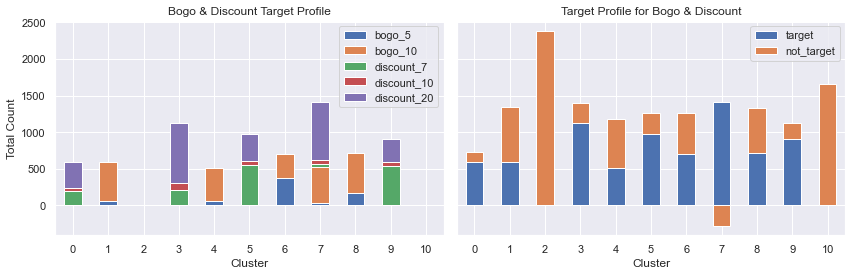

In [196]:
plot_assign_offer(target_main_summary)


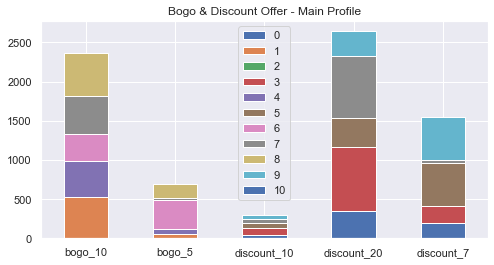

In [198]:
f, ax = plt.subplots(figsize=(8,4))
target_main_summary.loc[:, target_main_summary.columns.str.contains("bogo|discount")].T.plot(kind='bar',stacked=True,ax=ax)

ax.set_xticklabels(ax.get_xticklabels(), rotation=0);
ax.set_title('Bogo & Discount Offer - Main Profile');

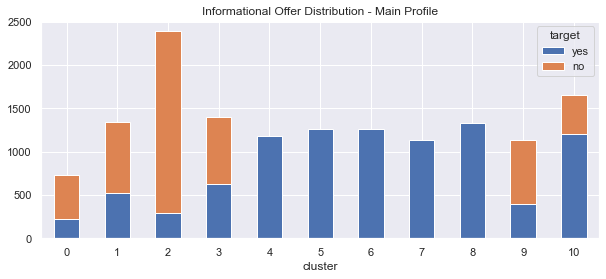

In [199]:

clust_info_main = profile_cluster_main.copy()
clust_info_main.loc[clust_info_main.cluster.isin([4,5,6,7,8]), 'target'] = "yes"
clust_info_main.loc[clust_info_main['rate_viewed_informational'] >= 0.8, 'target'] = 'yes'
clust_info_main['target'] = clust_info_main['target'].fillna("no")

f, ax = plt.subplots(figsize=(10,4))
clust_info_main.groupby(['cluster', 'target']).size().unstack()[['yes','no']].plot(kind='bar', stacked=True, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0);
ax.set_title('Informational Offer Distribution - Main Profile');

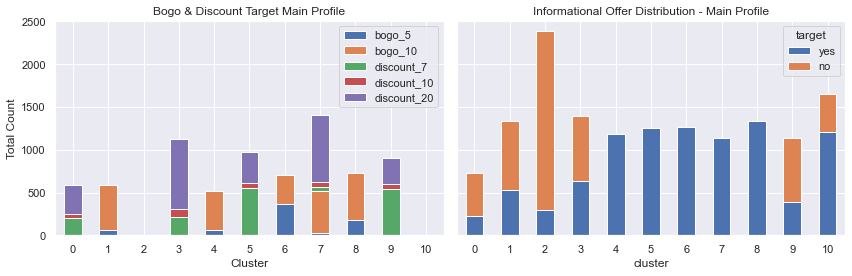

In [200]:

f, (ax1,ax2) = plt.subplots(1,2, figsize=(12,4), sharey=True)

target_main_summary[['bogo_5','bogo_10', 'discount_7', 'discount_10', 'discount_20']].plot(kind='bar', stacked=True, ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=0);
ax1.set_title('Bogo & Discount Target Main Profile')
ax1.set_xlabel('Cluster')
ax1.set_ylabel('Total Count')

clust_info_main.groupby(['cluster', 'target']).size().unstack()[['yes','no']].plot(kind='bar', stacked=True, ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0);
ax2.set_title('Informational Offer Distribution - Main Profile');

plt.tight_layout()

In [201]:

bogos = [0, 6,10]
discounts = [1,2,5,7]
target_sp = assign_offer_type(profile_cluster_sp, bogos, discounts)
target_sp.head()

offer received_bogo_10_10_7  \
Unnamed: 0                                                      
68be06ca386d4c31939f3a4f0e3dd783                          0.0   
38fe809add3b4fcf9315a9694bb96ff5                          0.0   
a03223e636434f42ac4c3df47e8bac43                          0.0   
8ec6ce2a7e7949b1bf142def7d0e0586                          0.0   
68617ca6246f4fbc85e91a2a49552598                          1.0   

                                  offer received_bogo_10_10_5  \
Unnamed: 0                                                      
68be06ca386d4c31939f3a4f0e3dd783                          0.0   
38fe809add3b4fcf9315a9694bb96ff5                          0.0   
a03223e636434f42ac4c3df47e8bac43                          0.0   
8ec6ce2a7e7949b1bf142def7d0e0586                          1.0   
68617ca6246f4fbc85e91a2a49552598                          1.0   

                                  offer received_informational_0_0_4  \
Unnamed: 0                                                             
68be06ca386d4c31939f3a4f0e3dd783                                 0.0   
38fe809add3b4fcf9315a9694bb96ff5                                 0.0   
a03223e636434f42ac4c3df47e8bac43                                 1.0   
8ec6ce2a7e7949b1bf142def7d0e0586                                 1.0   
68617ca6246f4fbc85e91a2a49552598                                 0.0   

                                  offer received_bogo_5_5_7  \
Unnamed: 0                                                    
68be06ca386d4c31939f3a4f0e3dd783                        0.0   
38fe809add3b4fcf9315a9694bb96ff5                        1.0   
a03223e636434f42ac4c3df47e8bac43                        0.0   
8ec6ce2a7e7949b1bf142def7d0e0586                        0.0   
68617ca6246f4fbc85e91a2a49552598                        1.0   

                                  offer received_discount_20_5_10  \
Unnamed: 0                                                          
68be06ca386d4c31939f3a4f0e3dd783                              1.0   
38fe809add3b4fcf9315a9694bb96ff5                              0.0   
a03223e636434f42ac4c3df47e8bac43                              3.0   
8ec6ce2a7e7949b1bf142def7d0e0586                              0.0   
68617ca6246f4fbc85e91a2a49552598                              0.0   

                                  offer received_discount_7_3_7  \
Unnamed: 0                                                        
68be06ca386d4c31939f3a4f0e3dd783                            1.0   
38fe809add3b4fcf9315a9694bb96ff5                            0.0   
a03223e636434f42ac4c3df47e8bac43                            0.0   
8ec6ce2a7e7949b1bf142def7d0e0586                            0.0   
68617ca6246f4fbc85e91a2a49552598                            1.0   

                                  offer received_discount_10_2_10  \
Unnamed: 0                                                          
68be06ca386d4c31939f3a4f0e3dd783                              2.0   
38fe809add3b4fcf9315a9694bb96ff5                              0.0   
a03223e636434f42ac4c3df47e8bac43                              0.0   
8ec6ce2a7e7949b1bf142def7d0e0586                              2.0   
68617ca6246f4fbc85e91a2a49552598                              0.0   

                                  offer received_informational_0_0_3  \
Unnamed: 0                                                             
68be06ca386d4c31939f3a4f0e3dd783                                 0.0   
38fe809add3b4fcf9315a9694bb96ff5                                 1.0   
a03223e636434f42ac4c3df47e8bac43                                 1.0   
8ec6ce2a7e7949b1bf142def7d0e0586                                 0.0   
68617ca6246f4fbc85e91a2a49552598                                 0.0   

                                  offer received_bogo_5_5_5  \
Unnamed: 0                                                    
68be06ca386d4c31939f3a4f0e3dd783                        0.0   
38fe809add3b4fcf9315a9694bb96ff5           

In [202]:

target_sp_summary = calc_assign_offer(target_sp)
target_sp_summary

bogo_10  bogo_5  discount_10  discount_20  discount_7  total_cluster  \
0       7.0   331.0          0.0          0.0         0.0          341.0   
1       0.0     0.0          2.0          0.0       231.0          233.0   
2       0.0     0.0          1.0          2.0       363.0          366.0   
3       0.0     0.0          0.0          0.0         0.0           19.0   
4       0.0     0.0          0.0          0.0         0.0          189.0   
5       0.0     0.0          4.0          7.0       122.0          136.0   
6       8.0    75.0          0.0          0.0         0.0           87.0   
7       0.0     0.0          3.0          3.0        69.0           75.0   
8       0.0     0.0          0.0          0.0         0.0          194.0   
9       0.0     0.0          0.0          0.0         0.0           25.0   
10      9.0   285.0          0.0          0.0         0.0          296.0   
11      0.0     0.0          0.0          0.0         0.0          231.0   

    target  target_frac  not_target  
0    338.0     0.991202         3.0  
1    233.0     1.000000         0.0  
2    366.0     1.000000         0.0  
3      0.0     0.000000        19.0  
4      0.0     0.000000       189.0  
5    133.0     0.977941         3.0  
6     83.0     0.954023         4.0  
7     75.0     1.000000         0.0  
8      0.0     0.000000       194.0  
9      0.0     0.000000        25.0  
10   294.0     0.993243         2.0  
11     0.0     0.000000       231.0

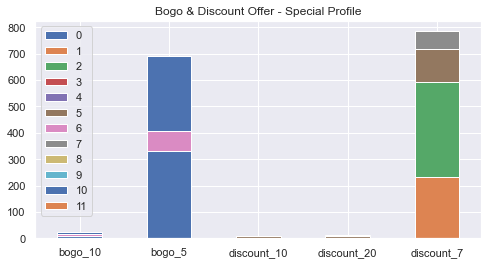

In [204]:
f, ax = plt.subplots(figsize=(8,4))
target_sp_summary.loc[:, target_sp_summary.columns.str.contains("bogo|discount")].T.plot(kind='bar',stacked=True,ax=ax)

ax.set_xticklabels(ax.get_xticklabels(), rotation=0);
ax.set_title('Bogo & Discount Offer - Special Profile');

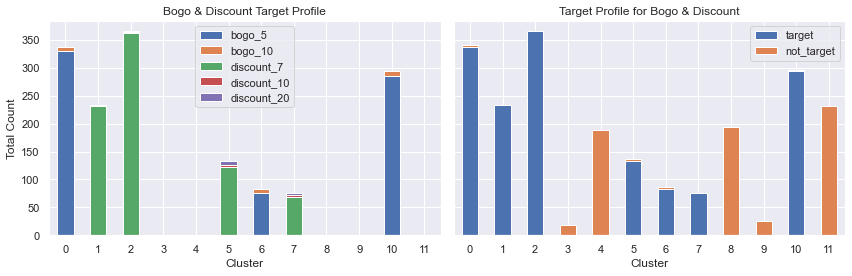

In [205]:
plot_assign_offer(target_sp_summary)


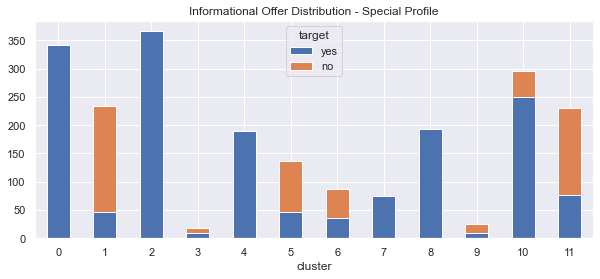

In [206]:

clust_info_sp = target_sp.copy()
clust_info_sp.loc[clust_info_sp.cluster.isin([0,2,4,7,8]), 'target'] = "yes"
clust_info_sp.loc[clust_info_sp['rate_viewed_informational'] >= 0.8, 'target'] = 'yes'
clust_info_sp['target'] = clust_info_sp['target'].fillna("no")

f, ax = plt.subplots(figsize=(10,4))
clust_info_sp.groupby(['cluster', 'target']).size().unstack()[['yes','no']].plot(kind='bar', stacked=True, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0);
ax.set_title('Informational Offer Distribution - Special Profile');

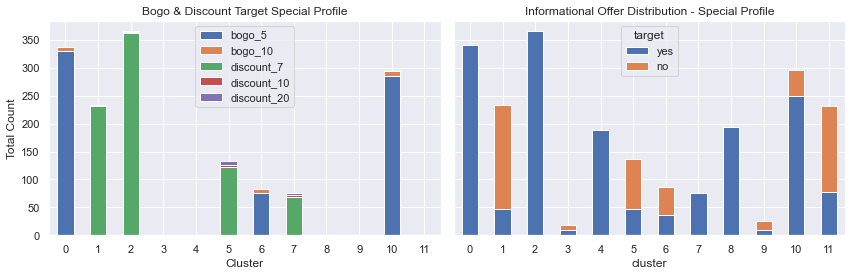

In [207]:

f, (ax1,ax2) = plt.subplots(1,2, figsize=(12,4), sharey=True)

target_sp_summary[['bogo_5','bogo_10', 'discount_7', 'discount_10', 'discount_20']].plot(kind='bar', stacked=True, ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=0);
ax1.set_title('Bogo & Discount Target Special Profile')
ax1.set_xlabel('Cluster')
ax1.set_ylabel('Total Count')

clust_info_sp.groupby(['cluster', 'target']).size().unstack()[['yes','no']].plot(kind='bar', stacked=True, ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0);
ax2.set_title('Informational Offer Distribution - Special Profile');

plt.tight_layout()

In [209]:

#main profile
main_series = target_main_summary.loc[:, target_main_summary.columns.str.contains("bogo|discount")].sum().rename('Main Profile')
main_series['informational'] = clust_info_main.groupby(['cluster', 'target']).size().unstack().sum()['yes']

#special profile 
sp_series = target_sp_summary.loc[:, target_sp_summary.columns.str.contains("bogo|discount")].sum().rename('Special Profile')
sp_series['informational'] = clust_info_sp.groupby(['cluster', 'target']).size().unstack().sum()['yes']

In [210]:
main_series


bogo_10          2366.0
bogo_5            692.0
discount_10       302.0
discount_20      2644.0
discount_7       1544.0
informational    9449.0
Name: Main Profile, dtype: float64

In [211]:
sp_series


bogo_10            24.0
bogo_5            691.0
discount_10        10.0
discount_20        12.0
discount_7        785.0
informational    1640.0
Name: Special Profile, dtype: float64

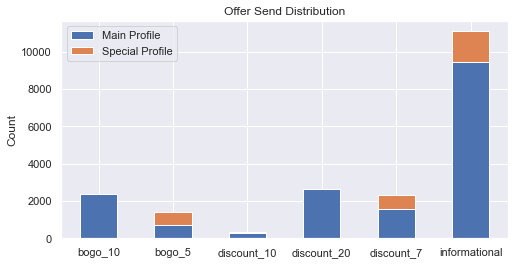

In [212]:
summary_df = pd.concat([main_series,sp_series], axis=1)

#bar plot
f, ax = plt.subplots(figsize=(8,4))
summary_df.plot(kind='bar', stacked=True, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0);
ax.set_title('Offer Send Distribution');
ax.set_ylabel('Count');